In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/xai-dataset-2/clinical_mastitis_cows.csv
/kaggle/input/xai-dataset-2/balanced_data_4.csv
/kaggle/input/xai-dataset-2/s6example.csv
/kaggle/input/xai-dataset-2/s5example.csv
/kaggle/input/xai-dataset-2/S1. Curated Input_v1.csv
/kaggle/input/xai-dataset-2/s6example_v1.csv
/kaggle/input/lstm-model/__results__.html
/kaggle/input/lstm-model/lstm_model_v1.h5
/kaggle/input/lstm-model/top_5_predictions_v1.0.csv
/kaggle/input/lstm-model/__notebook__.ipynb
/kaggle/input/lstm-model/__output__.json
/kaggle/input/lstm-model/custom.css
/kaggle/input/lstm-model/__results___files/__results___7_15.png
/kaggle/input/lstm-model/__results___files/__results___7_11.png
/kaggle/input/lstm-model/__results___files/__results___7_19.png
/kaggle/input/lstm-model/__results___files/__results___28_1.png
/kaggle/input/lstm-model/__results___files/__results___26_1.png
/kaggle/input/lstm-model/__results___files/__results___7_1.png
/kaggle/input/lstm-model/__results___files/__results___24_0.png
/kaggle/inp

In [2]:
from tensorflow.keras.models import load_model
import tensorflow as tf
# Load the model
loaded_model = load_model('/kaggle/input/lstm-model/lstm_model_v1.h5')

# Load the model with the custom loss
#temperature_feature_index = 9  # Adjust according to your feature index
#loaded_model = tf.keras.models.load_model('/kaggle/input/lstm-model/lstm_model.h5', custom_objects={'loss': custom_loss_wrapper(temperature_feature_index)})


2024-07-02 22:43:38.510124: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-02 22:43:38.510271: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-02 22:43:38.674591: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
# Load the dataset
X_test =pd.read_csv('/kaggle/input/xai-dataset-2/s6example_v1.csv')

X_test

,Months_after_giving_birth,IUFL,EUFL,IUFR,EUFR,IURL,EURL,IURR,EURR,Temperature,Health,ID,Unnamed: 12
0,3,242,280,238,280,240,288,242,281,38,0,Cow_1,NaN
1,3,310,354,239,283,239,282,235,278,55,1,Cow_1,NaN
2,4,146,176,146,177,146,175,145,176,37,0,Cow_2,NaN
3,4,150,180,150,180,150,181,150,181,43,0,Cow_2,NaN
4,6,160,178,306,354,152,180,156,177,45,1,Cow_3,NaN
5,3,161,185,302,364,157,190,157,189,49,1,Cow_3,NaN
6,1,289,290,157,189,156,187,154,183,37,1,Cow_4,NaN
7,1,321,364,157,189,156,187,154,183,52,1,Cow_4,NaN


In [4]:
X_test= X_test.drop(columns=[ 'Health','ID','Unnamed: 12'])
#X_test= X_test.drop(columns=[ 'Predicted Probability','Actual Label'])

X_test


,Months_after_giving_birth,IUFL,EUFL,IUFR,EUFR,IURL,EURL,IURR,EURR,Temperature
0,3,242,280,238,280,240,288,242,281,38
1,3,310,354,239,283,239,282,235,278,55
2,4,146,176,146,177,146,175,145,176,37
3,4,150,180,150,180,150,181,150,181,43
4,6,160,178,306,354,152,180,156,177,45
5,3,161,185,302,364,157,190,157,189,49
6,1,289,290,157,189,156,187,154,183,37
7,1,321,364,157,189,156,187,154,183,52


In [5]:
X_test_flat = X_test.values
X_test_flat

array([[  3, 242, 280, 238, 280, 240, 288, 242, 281,  38],
       [  3, 310, 354, 239, 283, 239, 282, 235, 278,  55],
       [  4, 146, 176, 146, 177, 146, 175, 145, 176,  37],
       [  4, 150, 180, 150, 180, 150, 181, 150, 181,  43],
       [  6, 160, 178, 306, 354, 152, 180, 156, 177,  45],
       [  3, 161, 185, 302, 364, 157, 190, 157, 189,  49],
       [  1, 289, 290, 157, 189, 156, 187, 154, 183,  37],
       [  1, 321, 364, 157, 189, 156, 187, 154, 183,  52]])

In [6]:
n_features = X_test.shape[1]
#X_train_reshaped = X_train.values.reshape((len(X_train), 1, n_features))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], 1, n_features))
X_test_reshaped

array([[[  3, 242, 280, 238, 280, 240, 288, 242, 281,  38]],

       [[  3, 310, 354, 239, 283, 239, 282, 235, 278,  55]],

       [[  4, 146, 176, 146, 177, 146, 175, 145, 176,  37]],

       [[  4, 150, 180, 150, 180, 150, 181, 150, 181,  43]],

       [[  6, 160, 178, 306, 354, 152, 180, 156, 177,  45]],

       [[  3, 161, 185, 302, 364, 157, 190, 157, 189,  49]],

       [[  1, 289, 290, 157, 189, 156, 187, 154, 183,  37]],

       [[  1, 321, 364, 157, 189, 156, 187, 154, 183,  52]]])

In [7]:
predictions = loaded_model.predict(X_test_reshaped)
predictions
binary_predictions = (predictions > 0.5).astype(int)
binary_predictions


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


array([[0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1]])

In [8]:
def model_predict(data):
    reshaped_data = data.reshape(data.shape[0], 1, data.shape[1])
    return loaded_model.predict(reshaped_data)

In [9]:
import shap
# Initialize KernelExplainer with a sample of the training data
explainer = shap.KernelExplainer(model_predict, shap.sample(X_test_flat, 100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [10]:
shap_values = explainer.shap_values(X_test_flat, nsamples=100)

  0%|          | 0/8 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [11]:
explainer.expected_value

array([0.76109683])

In [12]:
shap.initjs()

# Generate the force plot for the first record correctly
shap.force_plot(
    explainer.expected_value, shap_values[0][7],        # Use the flattened SHAP values
    X_test_flat[7],       # Feature values for the single record
    feature_names=X_test.columns.tolist()  # Names of the features
)

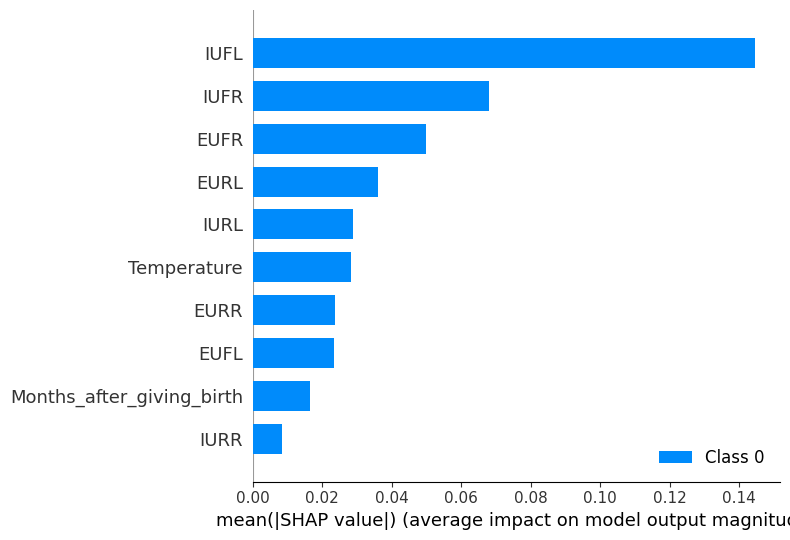

In [13]:
shap.summary_plot(
    shap_values,
    X_test_flat,  # Use the features corresponding to the SHAP values
    feature_names=X_test.columns.tolist()[:15]  # Ensure the feature names list is correctly aligned
)

In [14]:
shap.plots.force(explainer.expected_value,shap_values[0],feature_names=X_test.columns.tolist())

In [15]:
shap_values

[array([[ 0.02732797, -0.03942862, -0.01139468, -0.00834096,  0.        ,
         -0.07560625, -0.13865677, -0.01947329, -0.08459696, -0.0315096 ],
        [-0.00960879,  0.24258641, -0.00497411,  0.0088136 ,  0.02579549,
         -0.02274723, -0.01435847, -0.02760574, -0.02280039,  0.04209532],
        [-0.00391963, -0.20421395, -0.04507025, -0.09293264, -0.07922531,
          0.03935873,  0.03880965,  0.0111427 ,  0.01314461, -0.05155358],
        [ 0.01247935, -0.20142027, -0.03297218, -0.11456163, -0.09417813,
          0.01906012,  0.04737146,  0.        ,  0.        , -0.00892837],
        [-0.04325802, -0.04551392,  0.00247511,  0.12818474,  0.08939833,
          0.02860658,  0.00561733,  0.        ,  0.03309511,  0.04024683],
        [-0.00677618, -0.07479795,  0.02914411,  0.12411391,  0.09242976,
          0.02679616,  0.00699289,  0.        ,  0.01717628,  0.02377263],
        [ 0.01485642,  0.22007271,  0.00281187, -0.03950624, -0.00945266,
          0.0196218 ,  0.0237906

In [16]:
# Flatten the SHAP values to match the expected shape (samples, features)
shap_values_flat = np.array(shap_values).reshape((8, 10))
shap_values_flat

array([[ 0.02732797, -0.03942862, -0.01139468, -0.00834096,  0.        ,
        -0.07560625, -0.13865677, -0.01947329, -0.08459696, -0.0315096 ],
       [-0.00960879,  0.24258641, -0.00497411,  0.0088136 ,  0.02579549,
        -0.02274723, -0.01435847, -0.02760574, -0.02280039,  0.04209532],
       [-0.00391963, -0.20421395, -0.04507025, -0.09293264, -0.07922531,
         0.03935873,  0.03880965,  0.0111427 ,  0.01314461, -0.05155358],
       [ 0.01247935, -0.20142027, -0.03297218, -0.11456163, -0.09417813,
         0.01906012,  0.04737146,  0.        ,  0.        , -0.00892837],
       [-0.04325802, -0.04551392,  0.00247511,  0.12818474,  0.08939833,
         0.02860658,  0.00561733,  0.        ,  0.03309511,  0.04024683],
       [-0.00677618, -0.07479795,  0.02914411,  0.12411391,  0.09242976,
         0.02679616,  0.00699289,  0.        ,  0.01717628,  0.02377263],
       [ 0.01485642,  0.22007271,  0.00281187, -0.03950624, -0.00945266,
         0.0196218 ,  0.02379066,  0.00791098

In [17]:
import shap
shap_values_expl = shap.Explanation(values=shap_values_flat, base_values=explainer.expected_value, data=X_test_flat, feature_names=X_test.columns.tolist())

shap_values_expl

.values =
array([[ 0.02732797, -0.03942862, -0.01139468, -0.00834096,  0.        ,
        -0.07560625, -0.13865677, -0.01947329, -0.08459696, -0.0315096 ],
       [-0.00960879,  0.24258641, -0.00497411,  0.0088136 ,  0.02579549,
        -0.02274723, -0.01435847, -0.02760574, -0.02280039,  0.04209532],
       [-0.00391963, -0.20421395, -0.04507025, -0.09293264, -0.07922531,
         0.03935873,  0.03880965,  0.0111427 ,  0.01314461, -0.05155358],
       [ 0.01247935, -0.20142027, -0.03297218, -0.11456163, -0.09417813,
         0.01906012,  0.04737146,  0.        ,  0.        , -0.00892837],
       [-0.04325802, -0.04551392,  0.00247511,  0.12818474,  0.08939833,
         0.02860658,  0.00561733,  0.        ,  0.03309511,  0.04024683],
       [-0.00677618, -0.07479795,  0.02914411,  0.12411391,  0.09242976,
         0.02679616,  0.00699289,  0.        ,  0.01717628,  0.02377263],
       [ 0.01485642,  0.22007271,  0.00281187, -0.03950624, -0.00945266,
         0.0196218 ,  0.02379066,  

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")
sns.set(rc={"axes.facecolor":"#E8CE9D","figure.facecolor":"#E8CE9D","grid.color":"white"})
sns.set_context("poster",font_scale = .7)

# palette = ["#432C0A","#f7941d","#6c9a76","#f25a29","#cc4b57"]
palette = ["#764a23","#f7941d","#6c9a76","#f25a29","#cc4b57"]
palette_cmap = ["#6c9a76","#cc4b57","#764a23","#f25a29","#f7941d"]

# sns.palplot(sns.color_palette(palette))
# sns.palplot(sns.color_palette(palette_cmap))
# plt.show()

In [19]:
# Feature names from your data
feature_names = ['Months_after_giving_birth', 'IUFL', 'EUFL', 'IUFR', 'EUFR', 'IURL', 'EURL', 'IURR', 'EURR', 'Temperature']

# Corresponding feature values for the examples
data = np.array([[  3, 242, 280, 238, 280, 240, 288, 242, 281,  44],
                 [  4, 146, 176, 146, 177, 146, 175, 145, 176,  43],
                 [  1, 310, 354, 239, 283, 239, 282, 235, 278,  55],
                 [  6, 160, 178, 306, 354, 152, 180, 156, 177,  45],
                 [  1, 150, 180, 150, 180, 150, 181, 150, 181,  43],
                 [  3, 161, 185, 302, 364, 157, 190, 157, 189,  49],
                 [  4, 321, 364, 157, 189, 156, 187, 154, 183,  52]])

# Find the index of the 'Temperature' feature
temperature_index = feature_names.index('Temperature')

# Extract and print the temperature values
temperature_values = data[:, temperature_index]
print("Temperature values:", temperature_values)


Temperature values: [44 43 55 45 43 49 52]


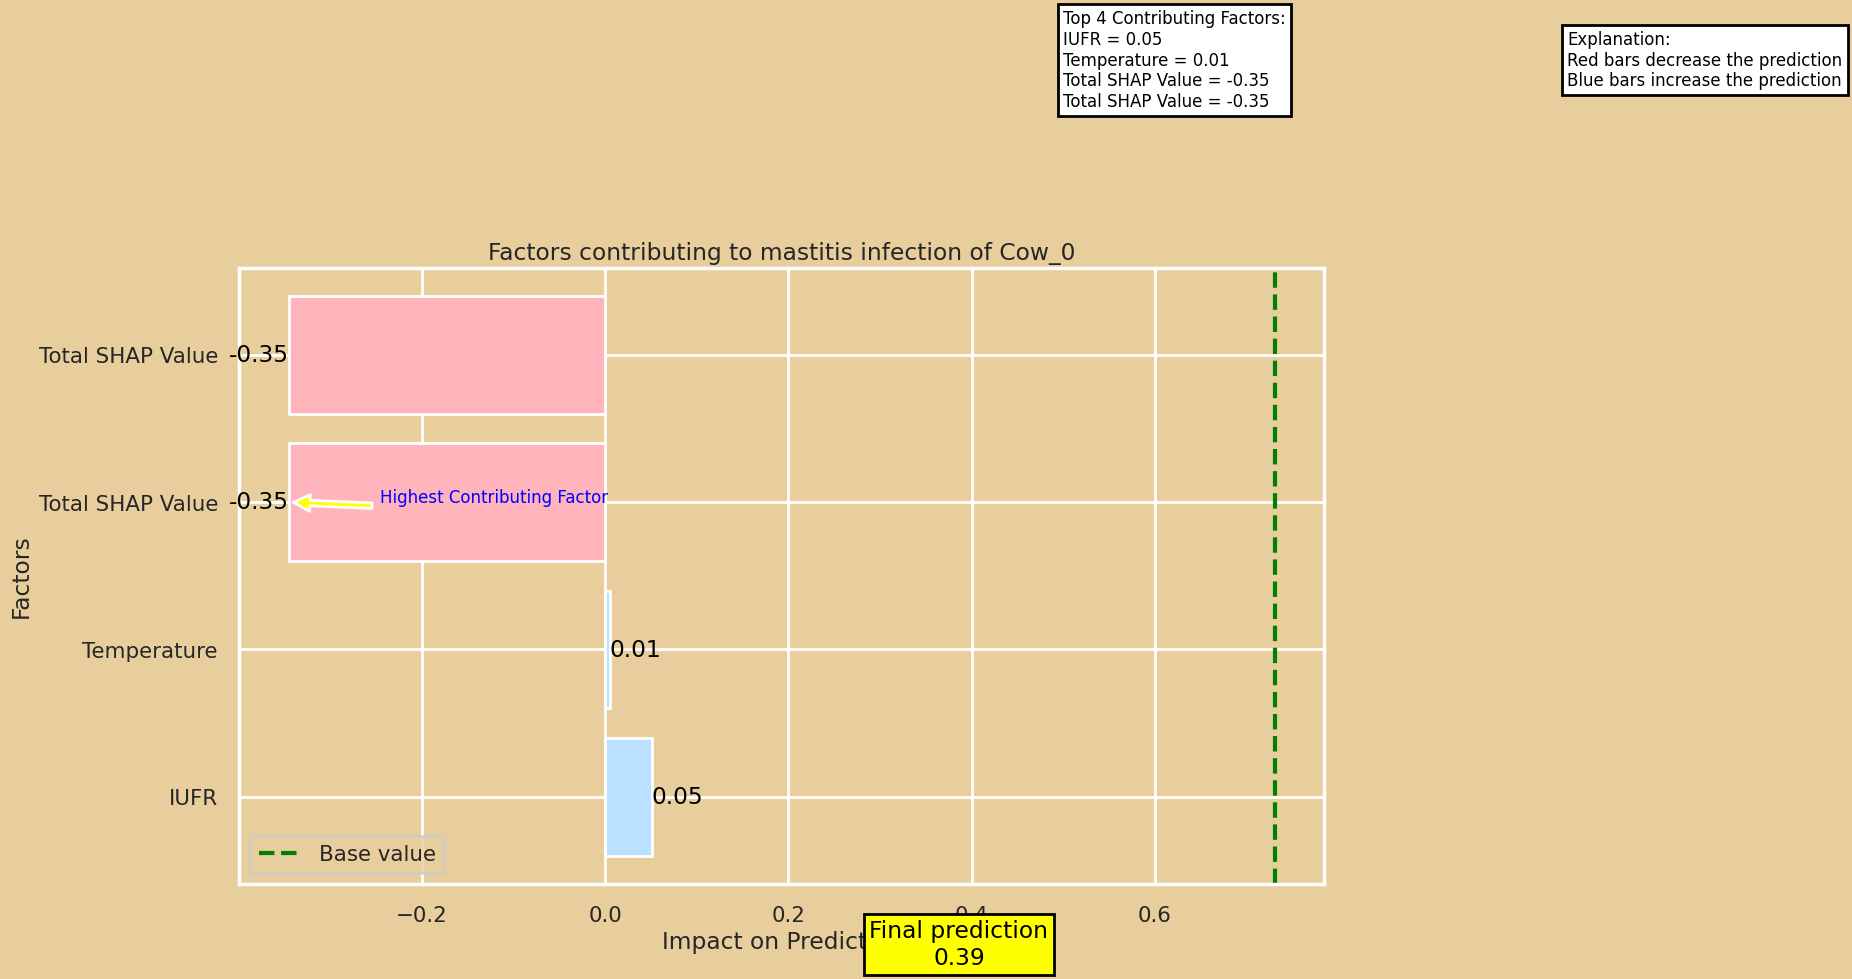

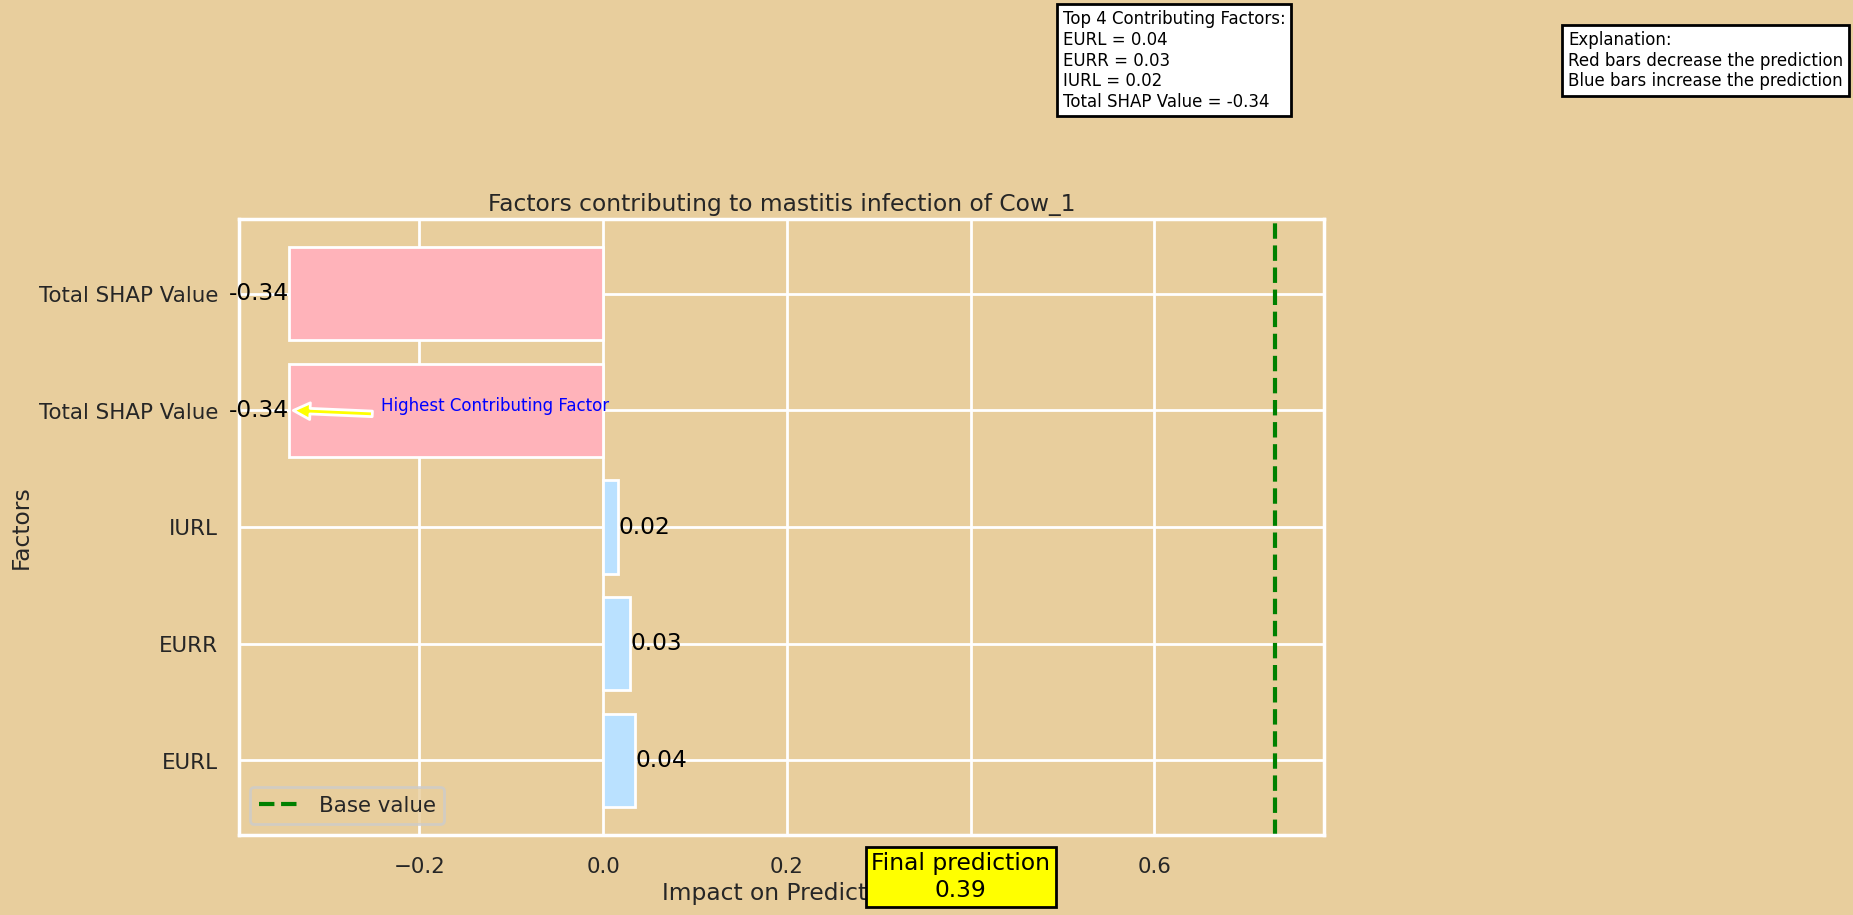

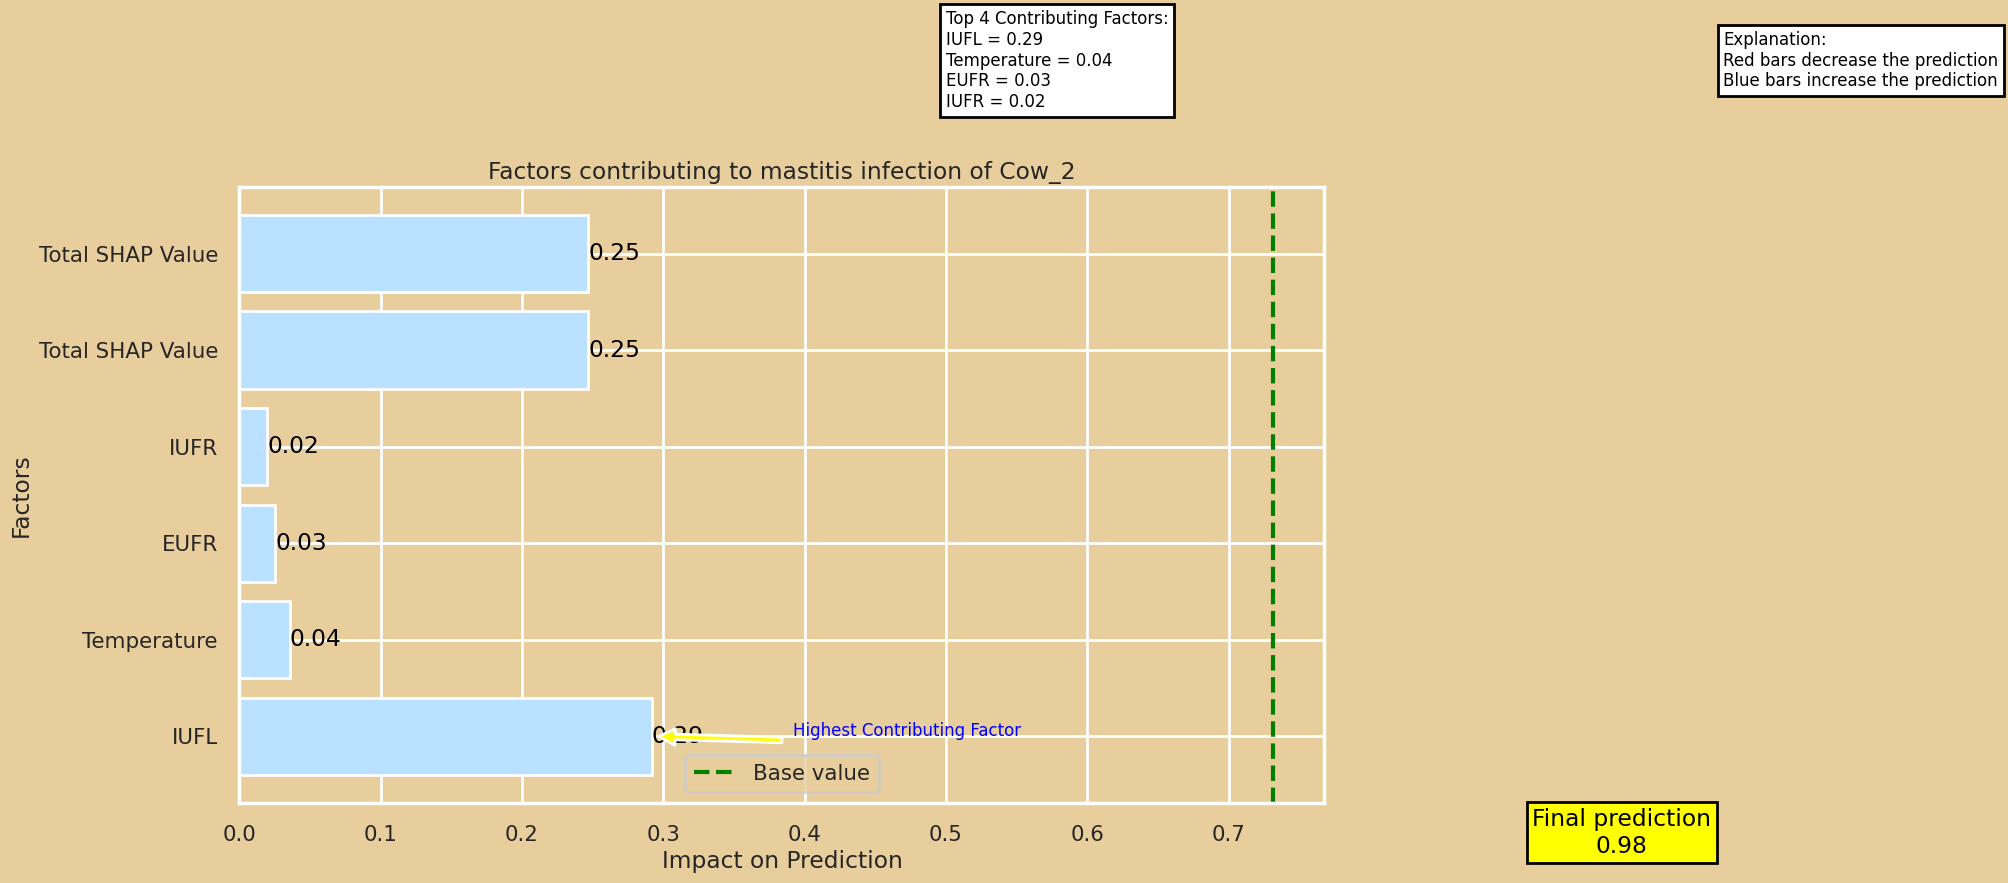

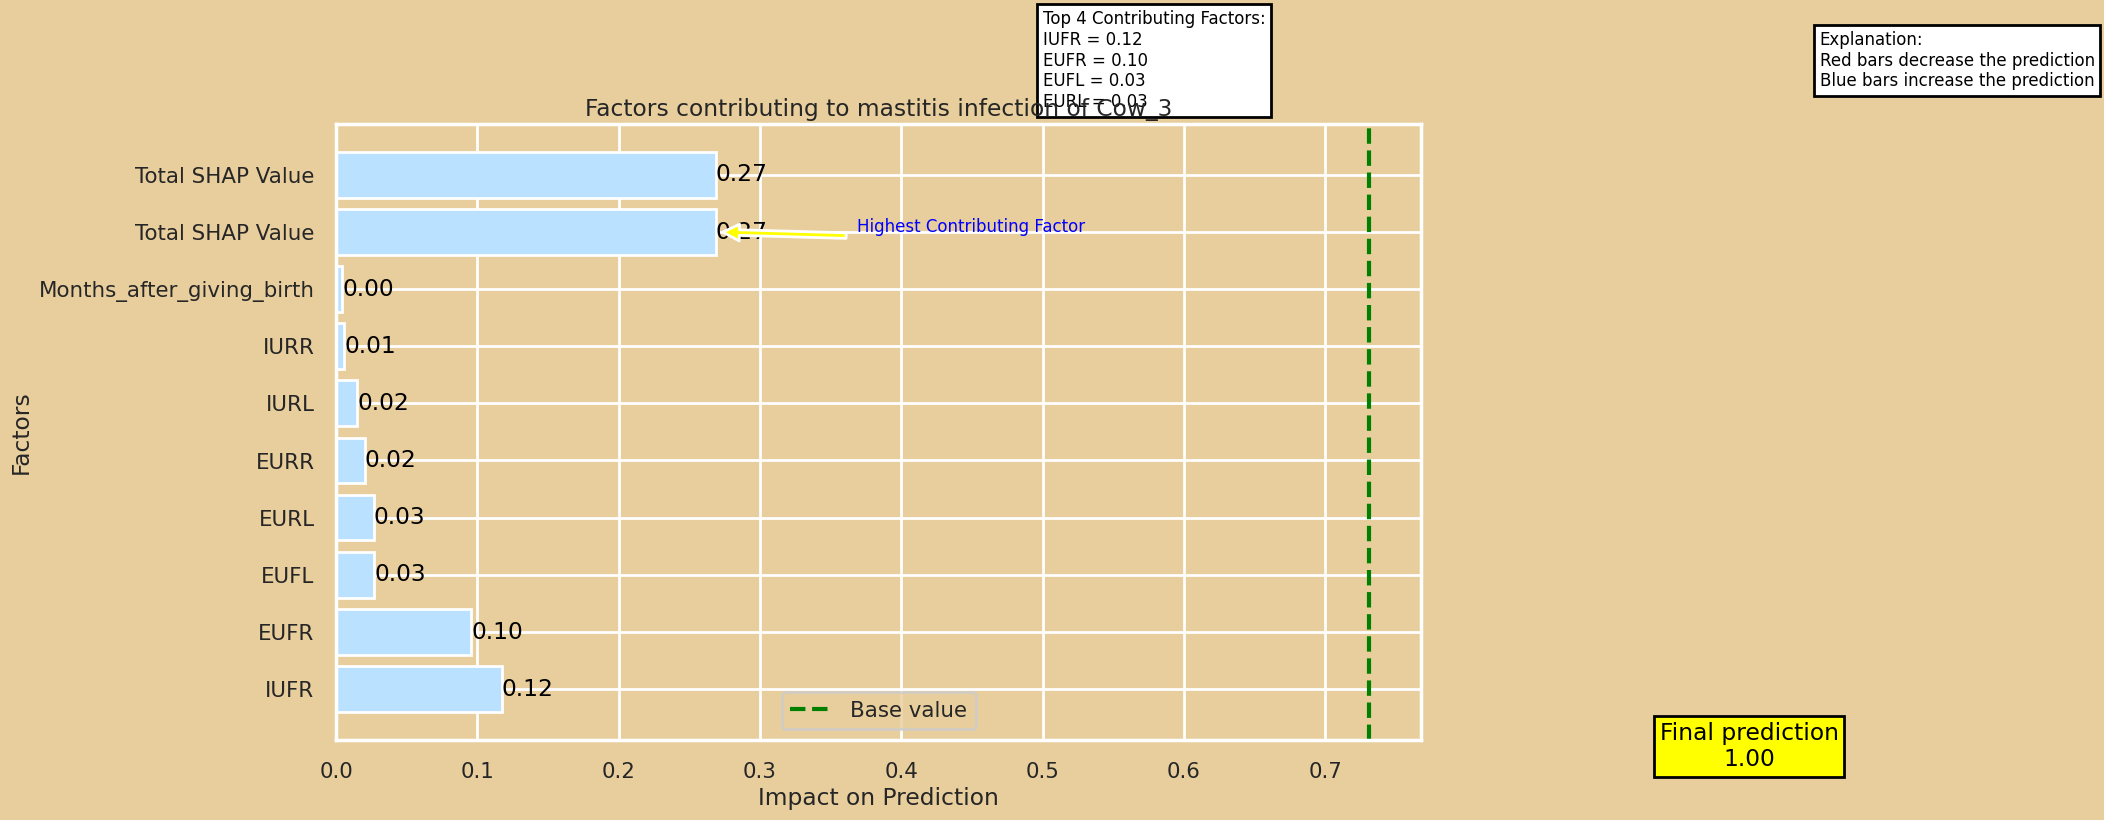

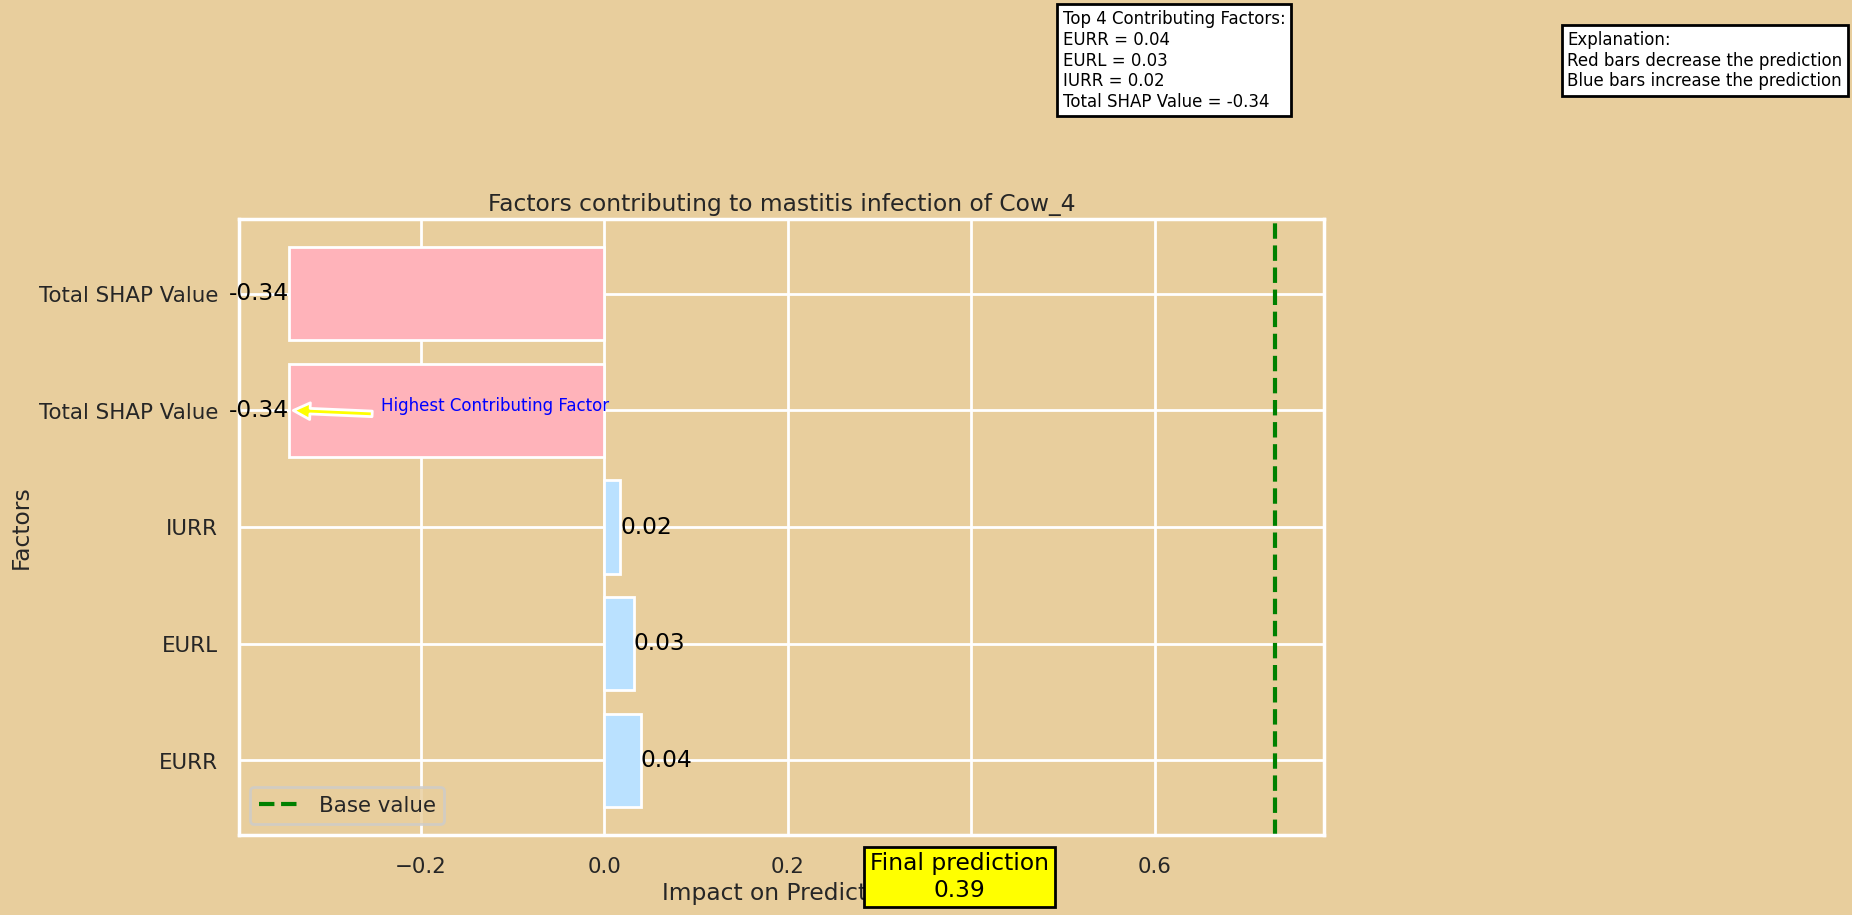

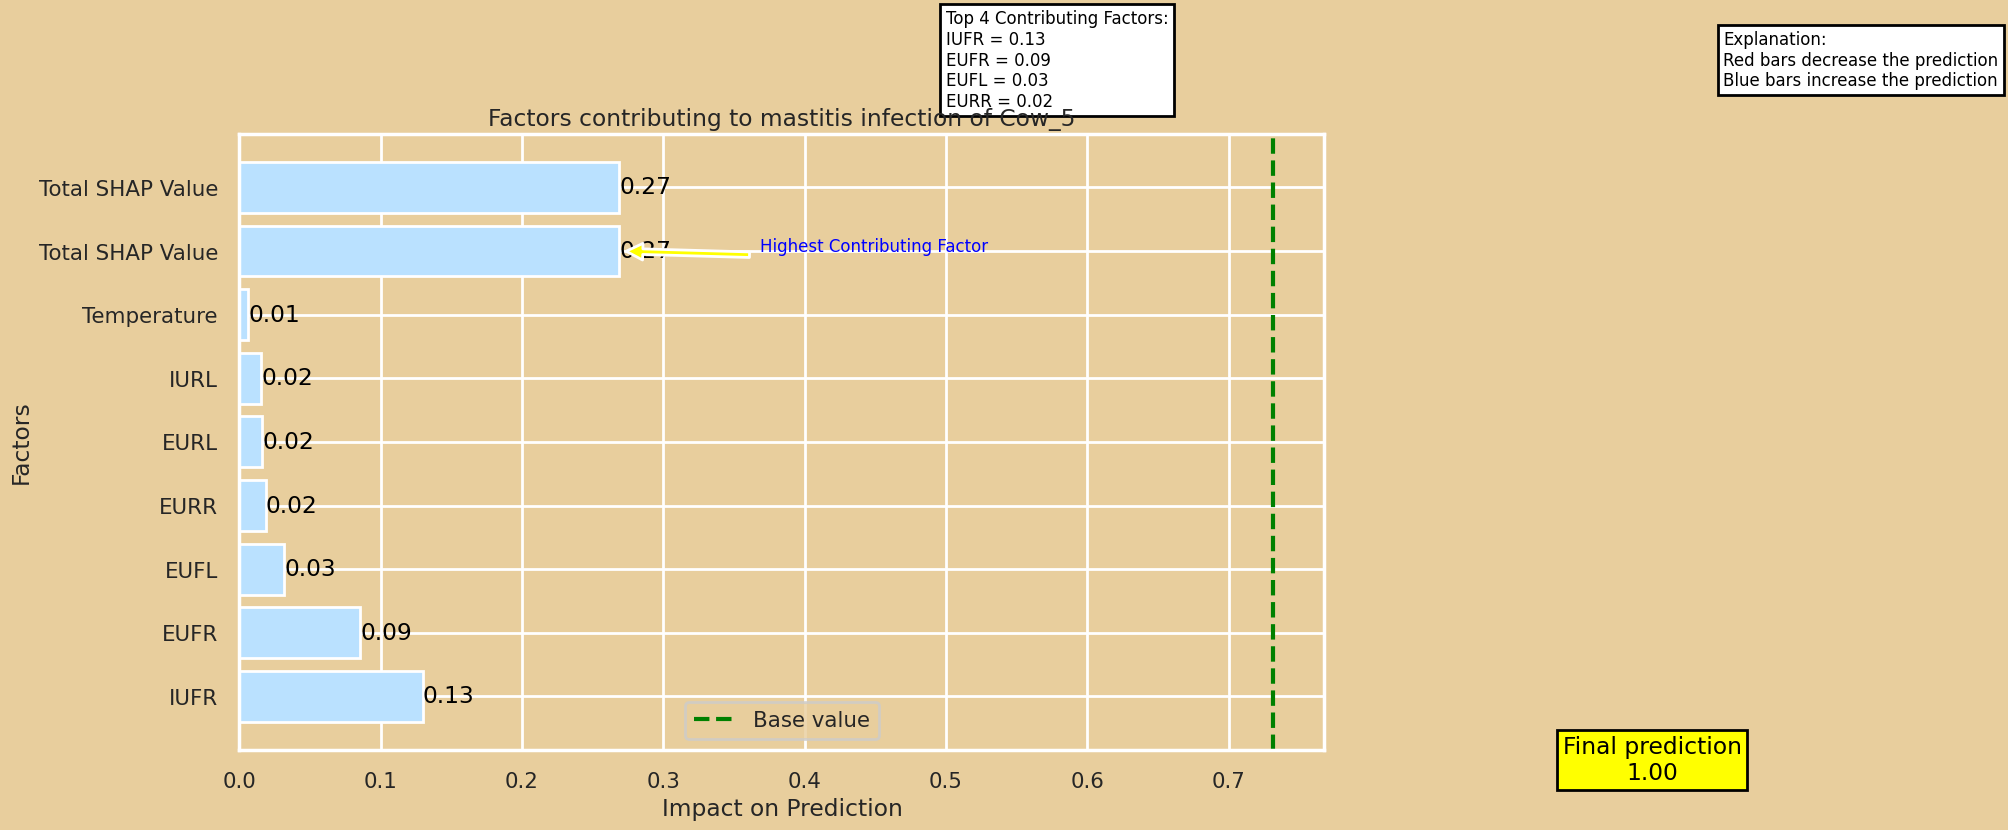

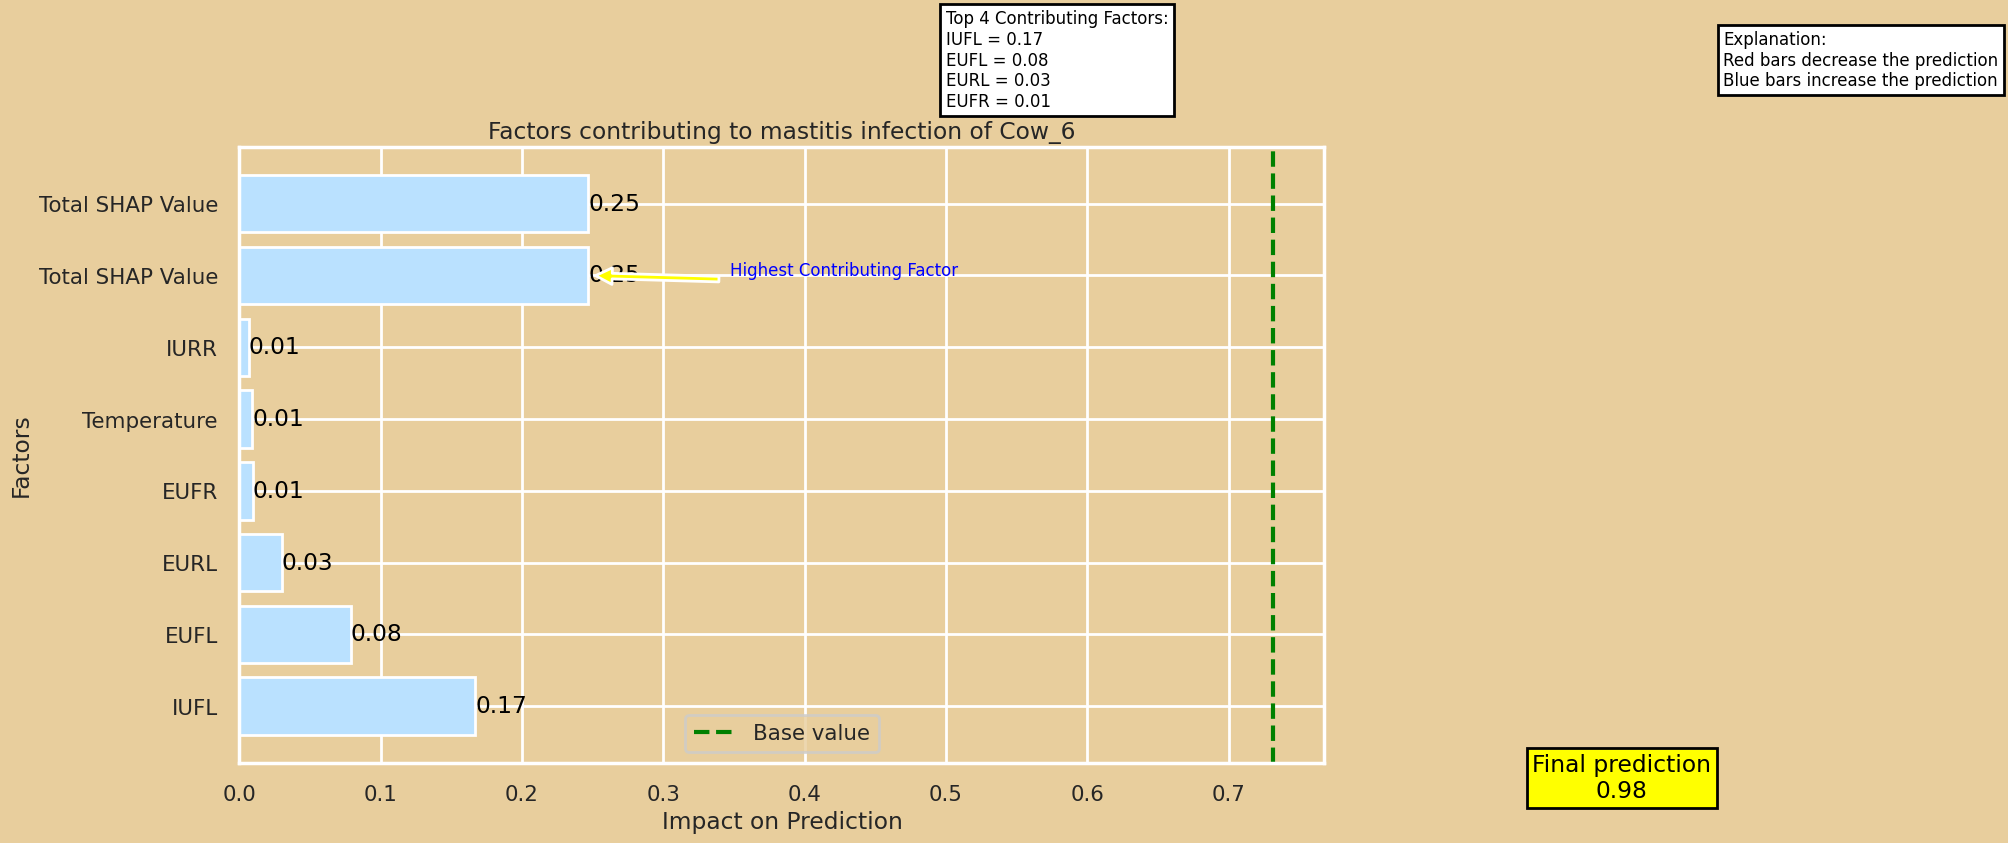

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def plot_shap_values(shap_values, feature_names, data, base_value, constant_features=['Temperature']):
    for i in range(shap_values.shape[0]):
        shap_val = shap_values[i]
        feature_vals = data[i]
        # Calculate the final prediction
        final_prediction = base_value + shap_val.sum()

        # Sort features by absolute SHAP value
        sorted_indices = np.argsort(np.abs(shap_val))[::-1]
        sorted_shap_val = shap_val[sorted_indices]
        sorted_feature_vals = feature_vals[sorted_indices]
        sorted_feature_names = np.array(feature_names)[sorted_indices]

        # Ensure the constant features are included
        for constant_feature in constant_features:
            if constant_feature in feature_names:
                constant_feature_index = feature_names.index(constant_feature)
                if constant_feature not in sorted_feature_names:
                    sorted_shap_val = np.append(sorted_shap_val, shap_val[constant_feature_index])
                    sorted_feature_vals = np.append(sorted_feature_vals, feature_vals[constant_feature_index])
                    sorted_feature_names = np.append(sorted_feature_names, constant_feature)

        # Only keep positive SHAP values for contributing factors
        positive_indices = sorted_shap_val > 0
        sorted_shap_val = sorted_shap_val[positive_indices]
        sorted_feature_vals = sorted_feature_vals[positive_indices]
        sorted_feature_names = sorted_feature_names[positive_indices]

        # Check if there are any positive SHAP values left
        if len(sorted_shap_val) == 0:
            print(f"No positive SHAP values for instance {i}")
            continue

        # Add Total SHAP Value to the feature values and SHAP values
        total_shap_val = shap_val.sum()
        sorted_shap_val = np.append(sorted_shap_val, total_shap_val)
        sorted_feature_vals = np.append(sorted_feature_vals, total_shap_val)
        sorted_feature_names = np.append(sorted_feature_names, 'Total SHAP Value')
        
        #Temperature
        total_shap_val = shap_val.sum()
        sorted_shap_val = np.append(sorted_shap_val, total_shap_val)
        sorted_feature_vals = np.append(sorted_feature_vals, total_shap_val)
        sorted_feature_names = np.append(sorted_feature_names, 'Total SHAP Value')

        # Colors for the bars
        colors = ['#FFB3BA' if val < 0 else '#BAE1FF' for val in sorted_shap_val]
        highlight_colors = ['#FF6666' if val < 0 else '#6699FF' for val in sorted_shap_val]

        # Create the plot
        plt.figure(figsize=(14, 8))
        bars = plt.barh(np.arange(len(sorted_shap_val)), sorted_shap_val, color=colors)

        # Add base value line
        plt.axvline(base_value, color='green', linestyle='--', label='Base value')

        # Add SHAP value annotations
        for bar, val in zip(bars, sorted_shap_val):
            plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{val:.2f}', 
                     va='center', ha='left' if val > 0 else 'right', color='black')

        # Add feature value annotations on y-axis
        plt.yticks(np.arange(len(sorted_shap_val)), 
                   [f"{name}" for name in sorted_feature_names])

        # Explanation text
        plt.text(1.05, len(sorted_shap_val) + 1, 'Explanation:\nRed bars decrease the prediction\nBlue bars increase the prediction',
                 va='center', ha='left', color='black', fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))

        # Highlight the highest contributing factor excluding total shap value
        if len(sorted_shap_val) > 1:
            max_shap_value = max(sorted_shap_val[:-1], key=abs)
            max_feature_index = np.argmax(sorted_shap_val[:-1] == max_shap_value)
            plt.annotate('Highest Contributing Factor',
                         xy=(max_shap_value, max_feature_index),
                         xytext=(max_shap_value + 0.1, max_feature_index),
                         arrowprops=dict(facecolor='yellow', shrink=0.05),
                         fontsize=12, color='blue', ha='left')

        # Add the final prediction as an annotation
        plt.text(final_prediction, -1, f'Final prediction\n{final_prediction:.2f}', 
                 va='center', ha='center', color='black', bbox=dict(facecolor='yellow', edgecolor='black'))

        # Add top contributing factors
        top_contributors = "\n".join([f"{name} = {value:.2f}" for name, value in zip(sorted_feature_names[:4], sorted_shap_val[:4])])
        plt.text(0.5, len(sorted_shap_val) + 1, f'Top 4 Contributing Factors:\n{top_contributors}', 
                 va='center', ha='left', color='black', fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))

        # Set labels and title
        plt.xlabel('Impact on Prediction')
        plt.ylabel('Factors')
        plt.title(f'Factors contributing to mastitis infection of Cow_{i}')
        plt.legend()
        plt.show()

# Example data from your SHAP values
shap_values = np.array([[-0.0249313 , -0.02220011, -0.04805024,  0.05117636, -0.03854101,
        -0.0499212 , -0.11806375, -0.03800474, -0.06164321,  0.00508279],
       [ 0.        , -0.16978972, -0.05044865, -0.10814502, -0.08780734,
         0.01647236,  0.0351134 ,  0.        ,  0.02974179, -0.00728942],
       [ 0.        ,  0.29160874,  0.        ,  0.01973205,  0.02528827,
        -0.07339267, -0.03626943, -0.01558695,  0.        ,  0.03561302],
       [ 0.00429352, -0.03156648,  0.0268775 ,  0.11733748,  0.09566912,
         0.01500875,  0.02662447,  0.0056644 ,  0.02024007, -0.01149809],
       [ 0.        , -0.14222494, -0.03710008, -0.13728571, -0.0789517 ,
        -0.00416108,  0.03199771,  0.0174903 ,  0.03976238, -0.03357058],
       [ 0.        , -0.03501506,  0.03168124,  0.12983159,  0.08551685,
         0.01555764,  0.01614246,  0.        ,  0.01866348,  0.00627204],
       [ 0.        ,  0.16671282,  0.07877897, -0.03249917,  0.0092327 ,
        -0.01321419,  0.02984047,  0.00667839, -0.00744425,  0.008913  ]])
# Feature names from your data
feature_names = ['Months_after_giving_birth', 'IUFL', 'EUFL', 'IUFR', 'EUFR', 'IURL', 'EURL', 'IURR', 'EURR', 'Temperature']

# Corresponding feature values for the examples
data = np.array([[  3, 242, 280, 238, 280, 240, 288, 242, 281,  44],
       [  4, 146, 176, 146, 177, 146, 175, 145, 176,  43],
       [  1, 310, 354, 239, 283, 239, 282, 235, 278,  55],
       [  6, 160, 178, 306, 354, 152, 180, 156, 177,  45],
       [  1, 150, 180, 150, 180, 150, 181, 150, 181,  43],
       [  3, 161, 185, 302, 364, 157, 190, 157, 189,  49],
       [  4, 321, 364, 157, 189, 156, 187, 154, 183,  52]])

# Base value for SHAP calculations (example)
base_value = 0.73129819

plot_shap_values(shap_values, feature_names, data, base_value, constant_features=['Temperature', 'Total SHAP Value'])


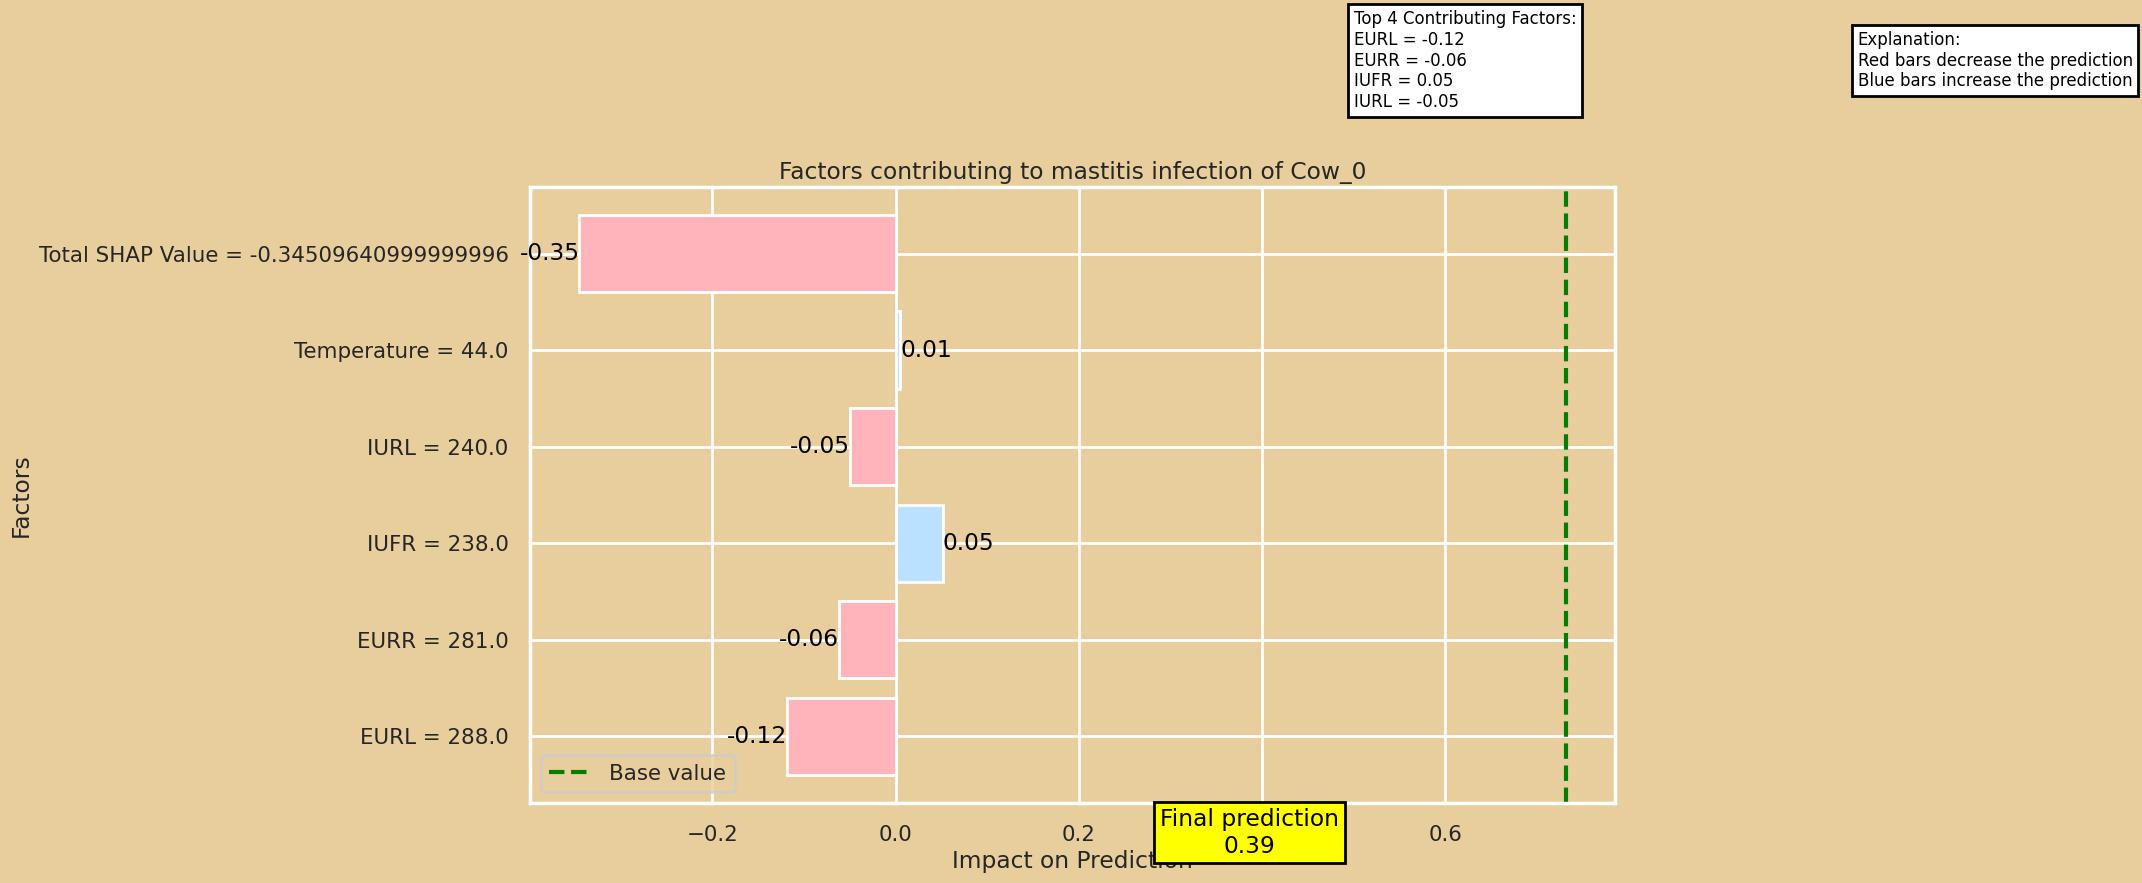

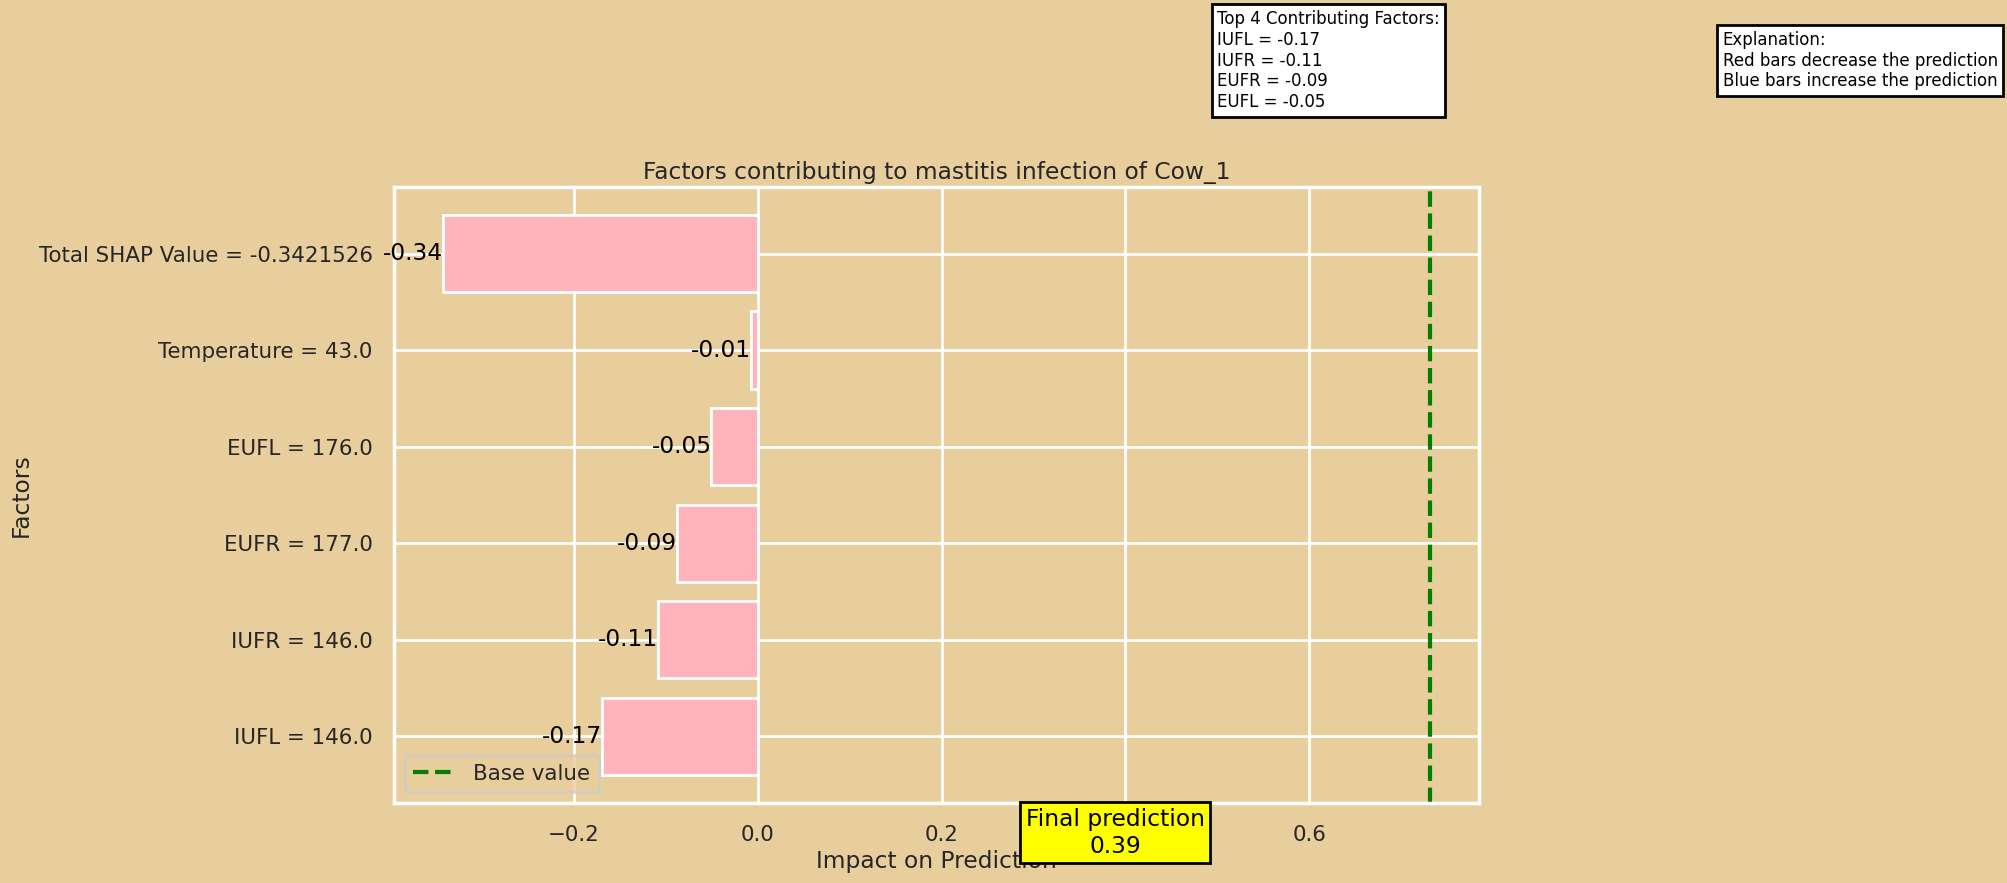

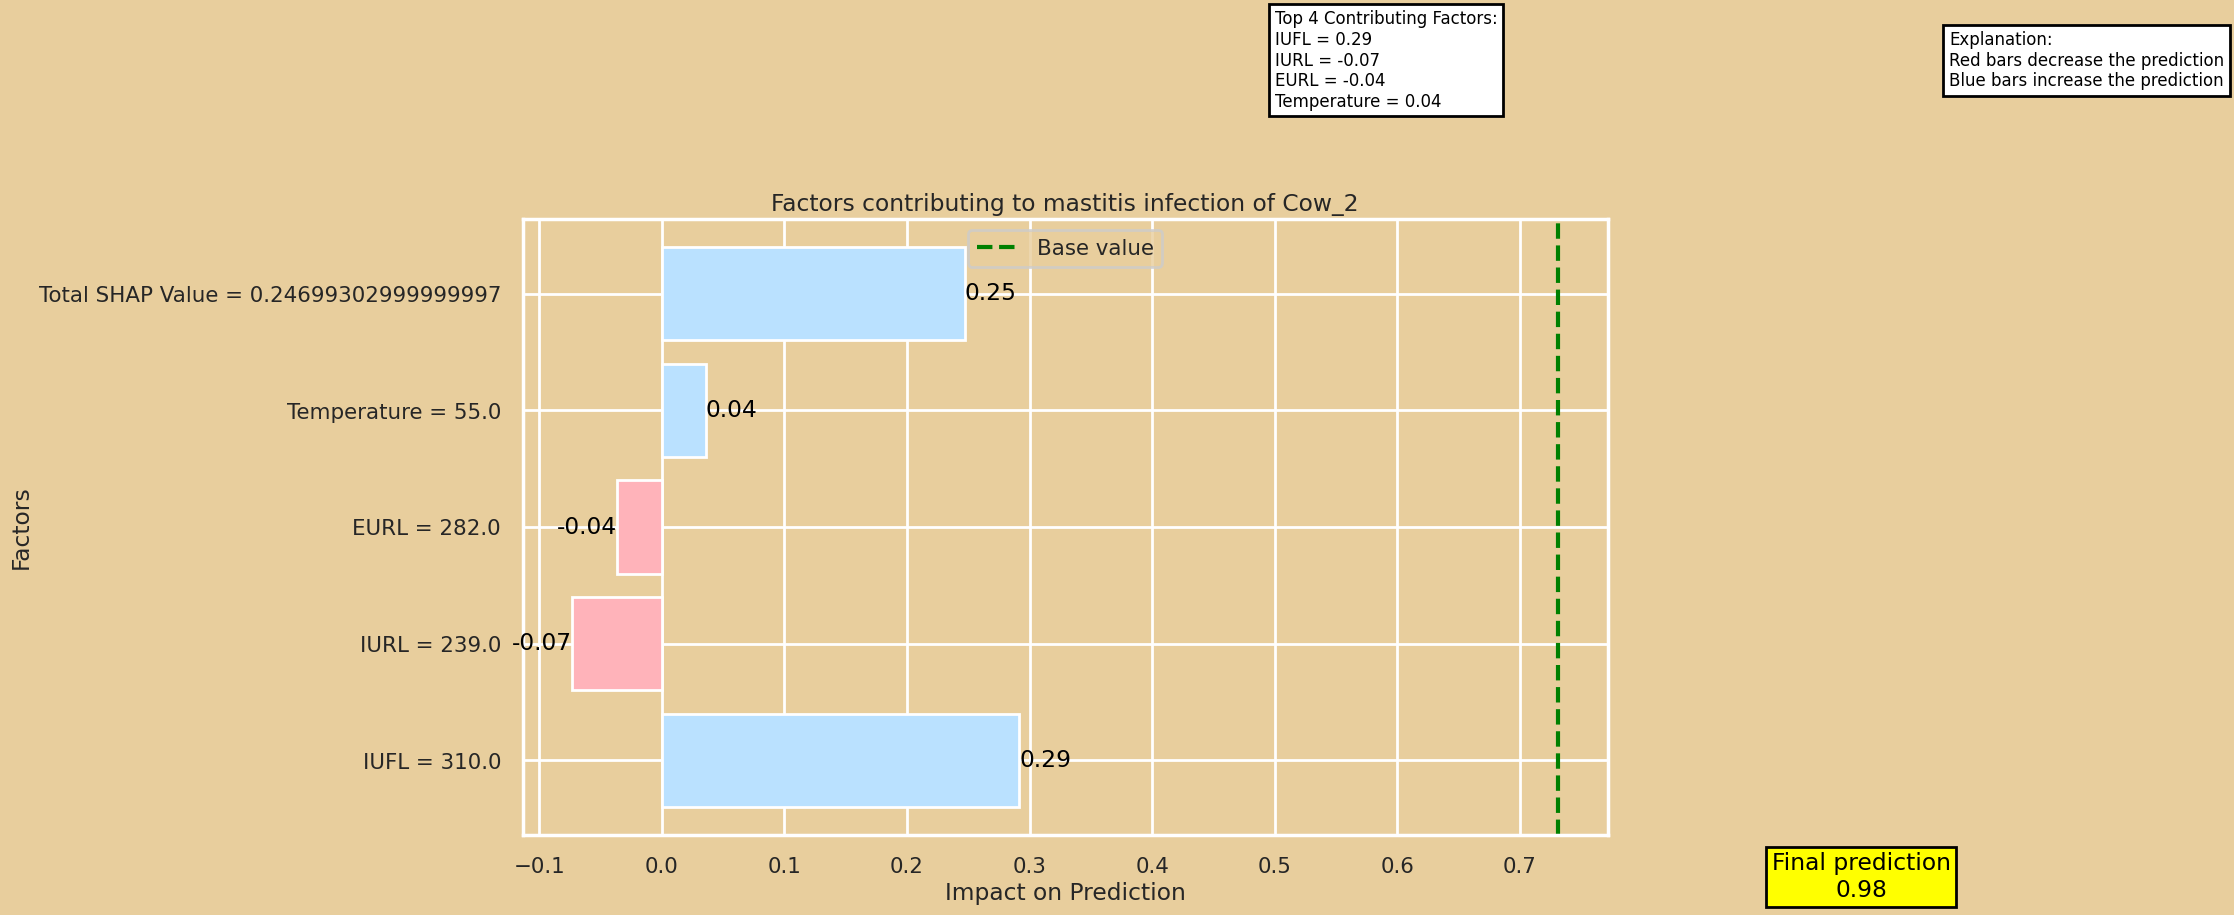

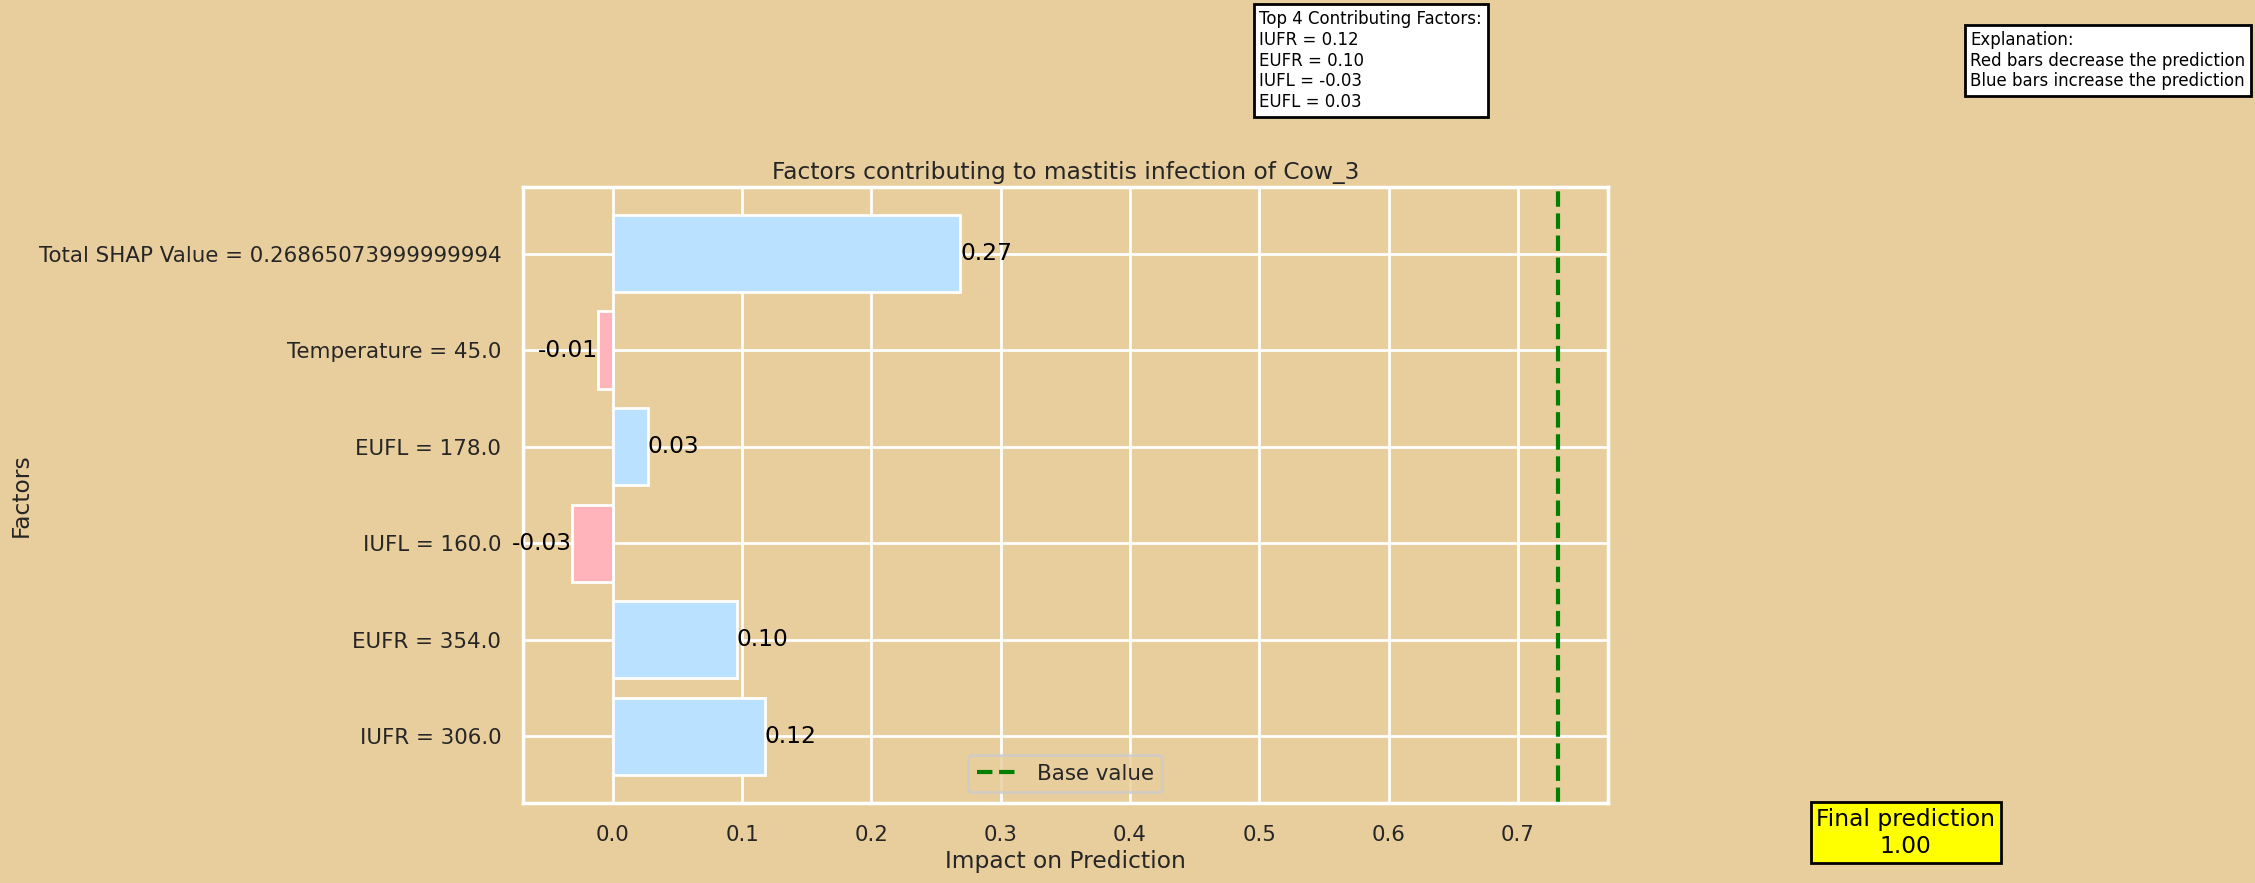

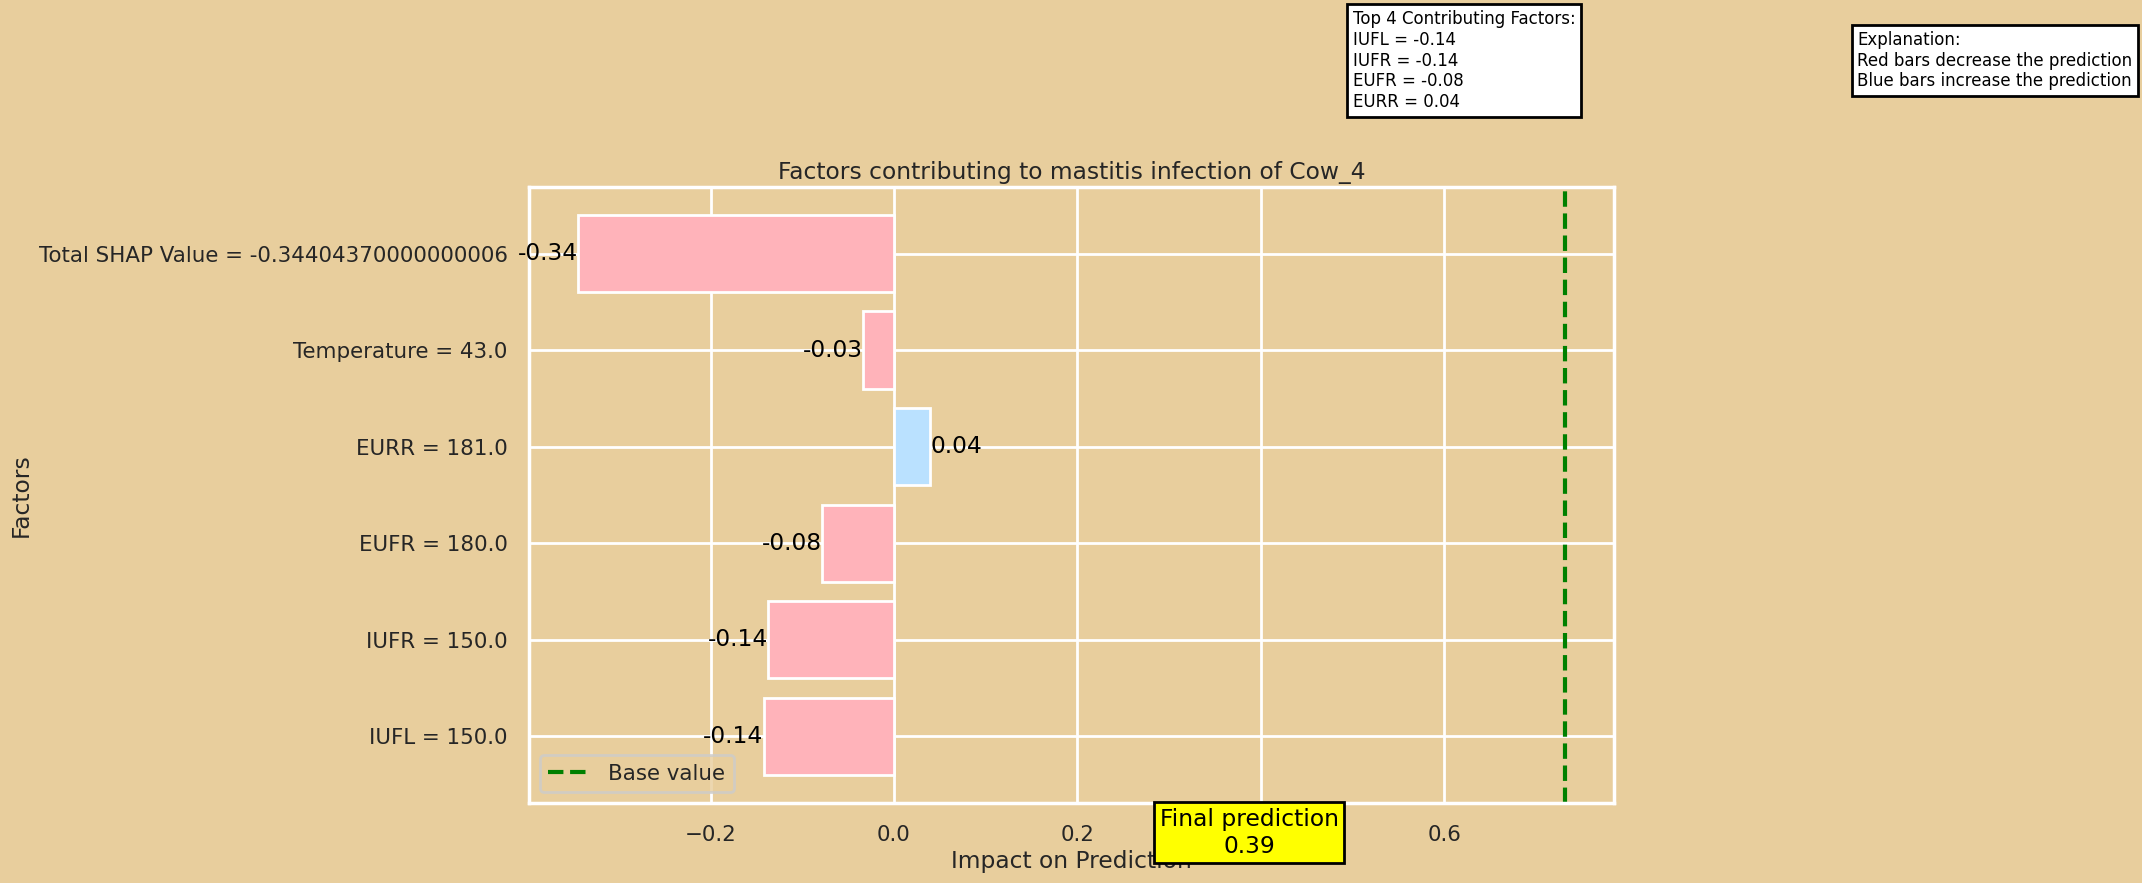

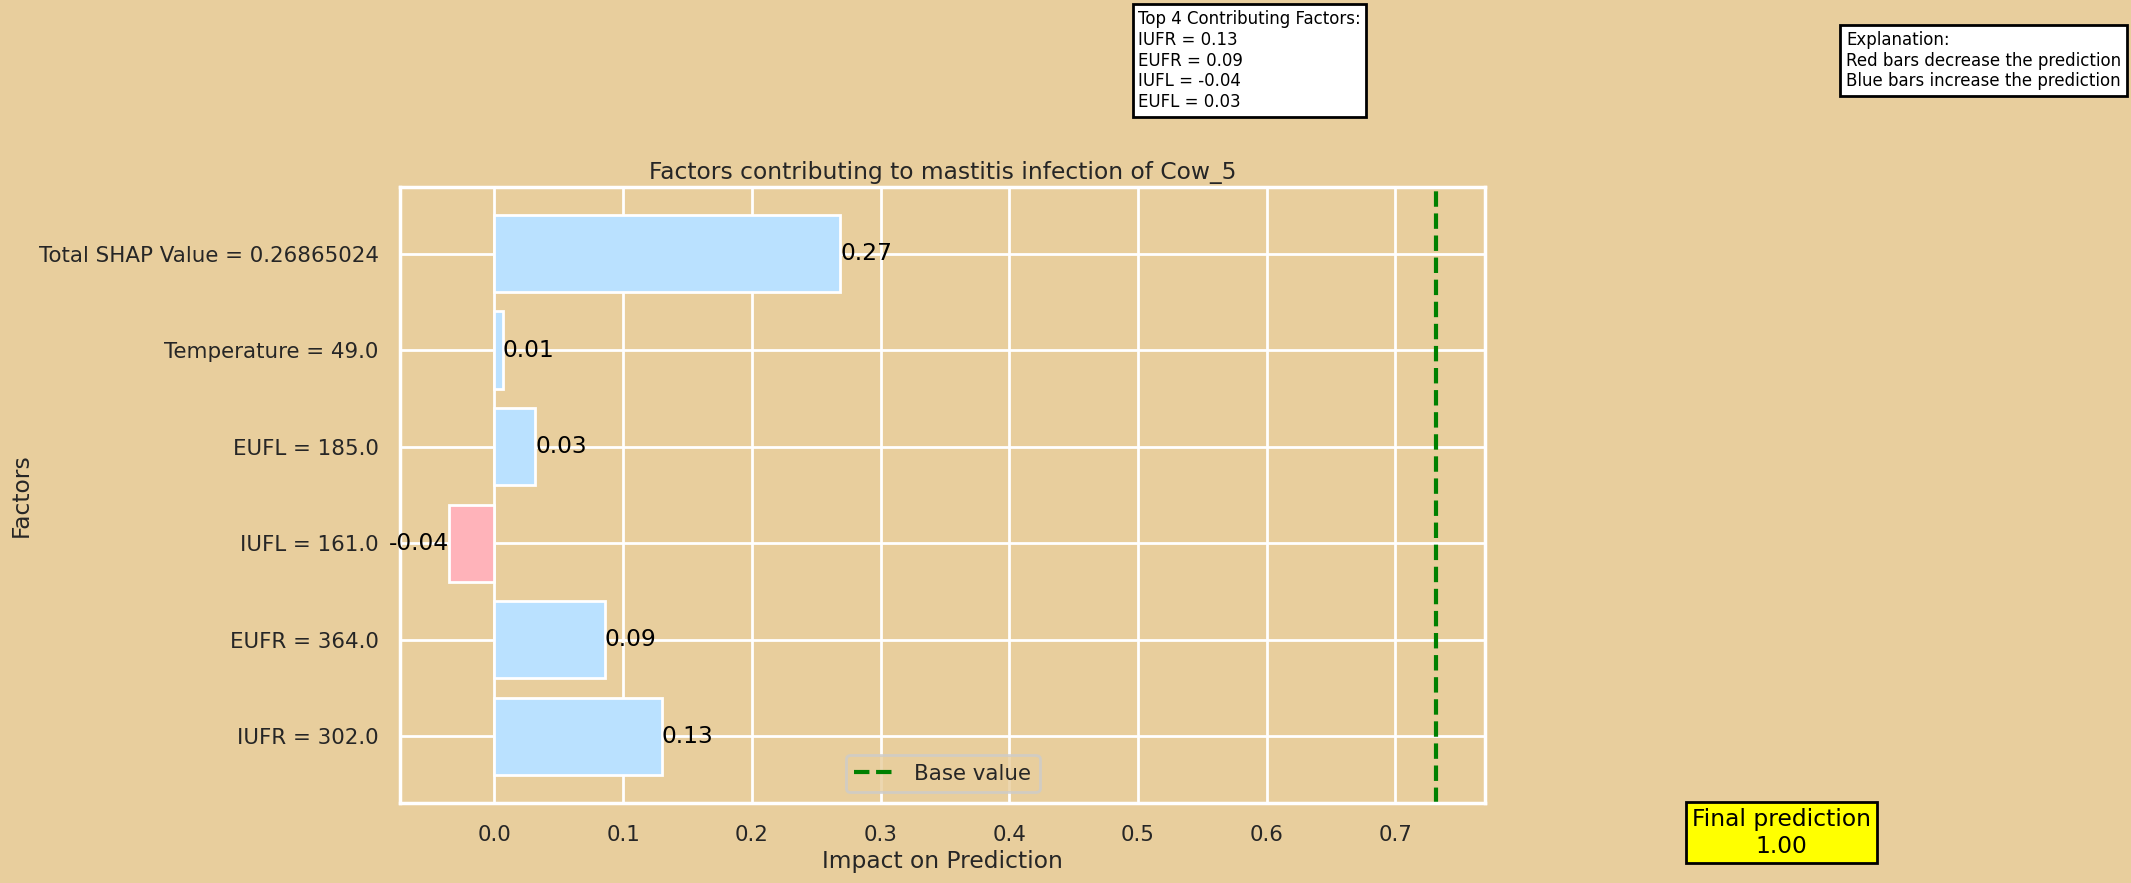

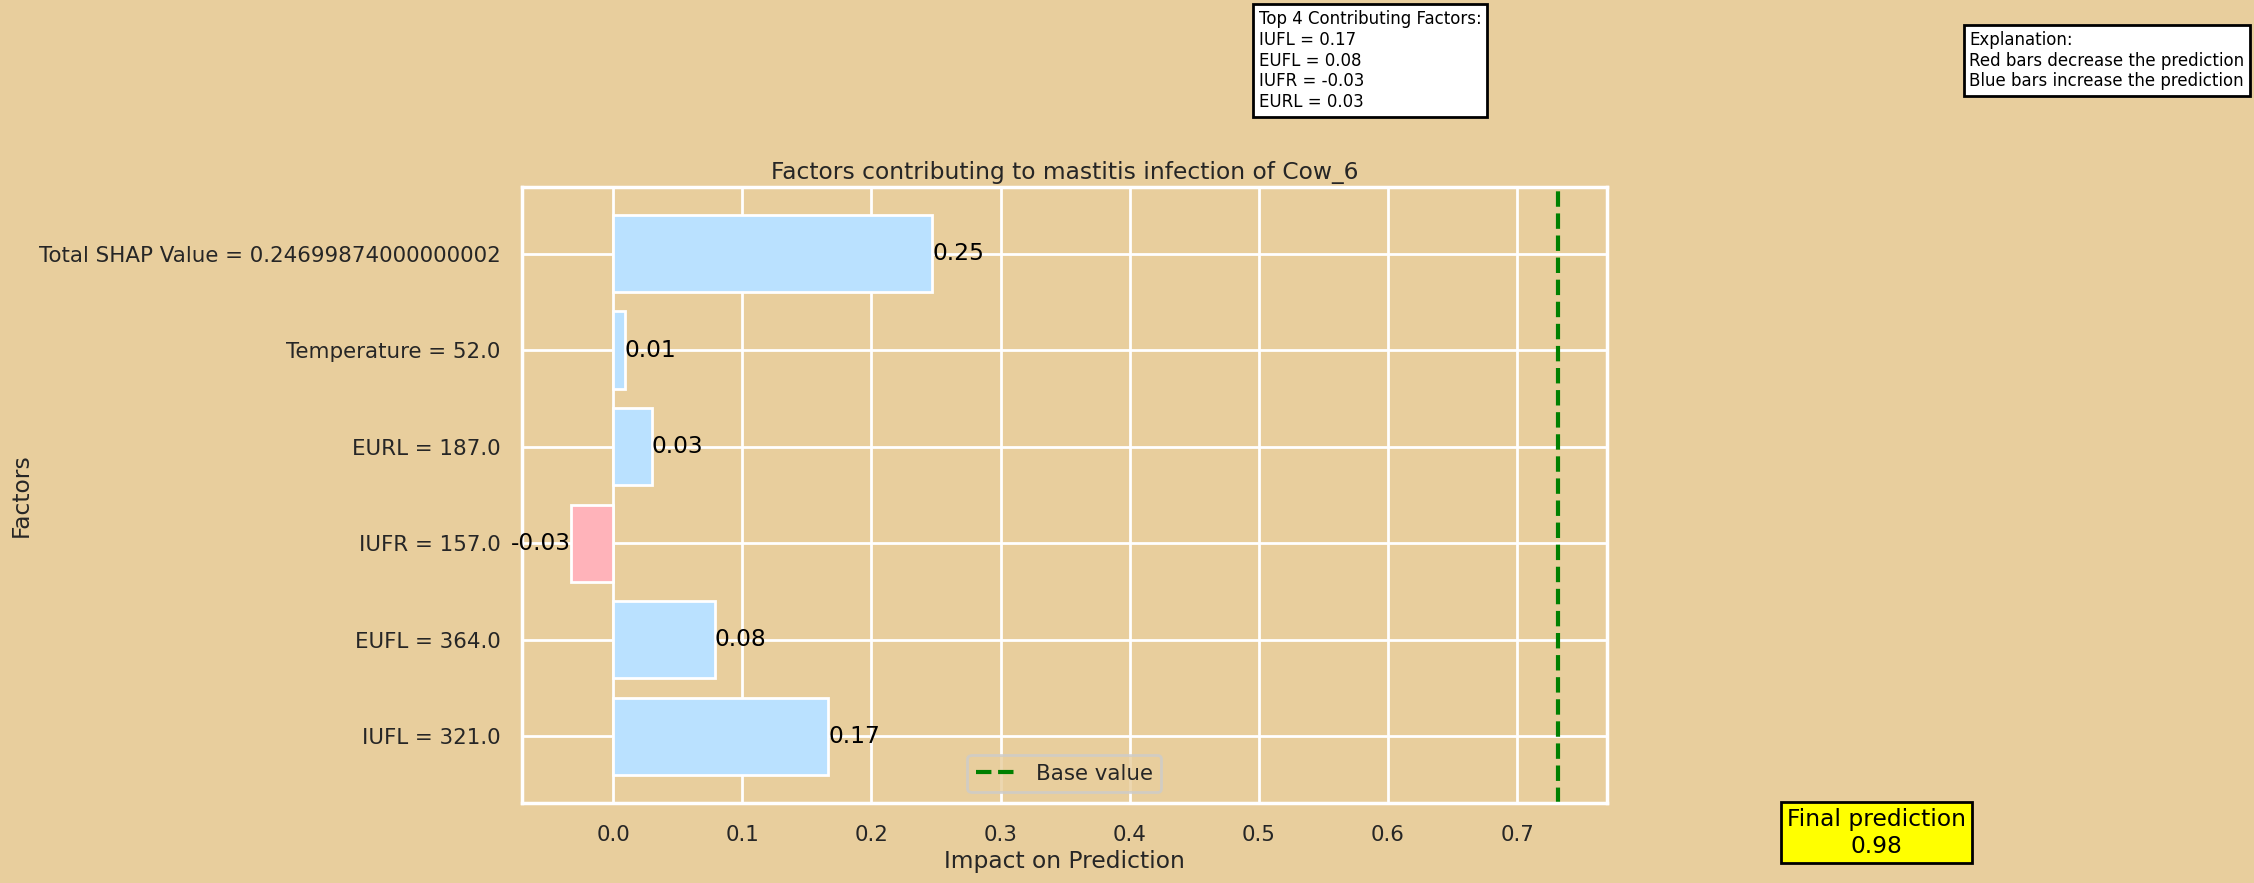

In [21]:
import matplotlib.pyplot as plt
import numpy as np

def plot_shap_values(shap_values, feature_names, data, base_value, constant_features=['Temperature', 'Total SHAP Value']):
    for i in range(shap_values.shape[0]):
        shap_val = shap_values[i]
        feature_vals = data[i]

        # Calculate the final prediction
        final_prediction = base_value + shap_val.sum()

        # Sort features by absolute SHAP value
        sorted_indices = np.argsort(np.abs(shap_val))[::-1]
        sorted_shap_val = shap_val[sorted_indices]
        sorted_feature_vals = feature_vals[sorted_indices]
        sorted_feature_names = np.array(feature_names)[sorted_indices]

        # Select top 4 features by SHAP value
        top_indices = sorted_indices[:4]
        top_shap_val = shap_val[top_indices]
        top_feature_vals = feature_vals[top_indices]
        top_feature_names = np.array(feature_names)[top_indices]

        # Ensure the constant features are included
        for constant_feature in constant_features:
            if constant_feature == 'Total SHAP Value':
                total_shap_val = shap_val.sum()
                if 'Total SHAP Value' not in top_feature_names:
                    top_shap_val = np.append(top_shap_val, total_shap_val)
                    top_feature_vals = np.append(top_feature_vals, total_shap_val)
                    top_feature_names = np.append(top_feature_names, constant_feature)
            else:
                if constant_feature in feature_names:
                    constant_feature_index = feature_names.index(constant_feature)
                    if constant_feature not in top_feature_names:
                        top_shap_val = np.append(top_shap_val, shap_val[constant_feature_index])
                        top_feature_vals = np.append(top_feature_vals, feature_vals[constant_feature_index])
                        top_feature_names = np.append(top_feature_names, constant_feature)

        # Ensure only 6 features are displayed
        if len(top_shap_val) > 6:
            top_shap_val = top_shap_val[:6]
            top_feature_vals = top_feature_vals[:6]
            top_feature_names = top_feature_names[:6]

        # Colors for the bars
        colors = ['#FFB3BA' if val < 0 else '#BAE1FF' for val in top_shap_val]
        highlight_colors = ['#FF6666' if val < 0 else '#6699FF' for val in top_shap_val]

        # Create the plot
        plt.figure(figsize=(14, 8))
        bars = plt.barh(np.arange(len(top_shap_val)), top_shap_val, color=colors)

        # Add base value line
        plt.axvline(base_value, color='green', linestyle='--', label='Base value')

        # Add SHAP value annotations
        for bar, val in zip(bars, top_shap_val):
            plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{val:.2f}', 
                     va='center', ha='left' if val > 0 else 'right', color='black')

        # Add feature value annotations on y-axis
        plt.yticks(np.arange(len(top_shap_val)), 
                   [f"{name} = {value}" for name, value in zip(top_feature_names, top_feature_vals)])

        # Explanation text
        plt.text(1.05, len(top_shap_val) + 1, 'Explanation:\nRed bars decrease the prediction\nBlue bars increase the prediction',
                 va='center', ha='left', color='black', fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))

        # Highlight the highest contributing factor excluding total shap value
        if len(top_shap_val) > 1:
            max_shap_value = max(top_shap_val[:-1], key=abs)
            max_feature_index = np.argmax(top_shap_val[:-1] == max_shap_value)
           # plt.annotate('Highest Contributing Factor',
                         #xy=(max_shap_value, max_feature_index),
                         #xytext=(max_shap_value + 0.1, max_feature_index),
                         #arrowprops=dict(facecolor='yellow', shrink=0.05),
                         #fontsize=12, color='blue', ha='left')

        # Add the final prediction as an annotation
        plt.text(final_prediction, -1, f'Final prediction\n{final_prediction:.2f}', 
                 va='center', ha='center', color='black', bbox=dict(facecolor='yellow', edgecolor='black'))

        # Add top contributing factors
        top_contributors = "\n".join([f"{name} = {value:.2f}" for name, value in zip(top_feature_names[:4], top_shap_val[:4])])
        plt.text(0.5, len(top_shap_val) + 1, f'Top 4 Contributing Factors:\n{top_contributors}', 
                 va='center', ha='left', color='black', fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))

        
        # Set labels and title
        plt.xlabel('Impact on Prediction')
        plt.ylabel('Factors')
        plt.title(f'Factors contributing to mastitis infection of Cow_{i}')
        plt.legend()
        plt.show()

# Example data from your SHAP values
shap_values = np.array([[-0.0249313 , -0.02220011, -0.04805024,  0.05117636, -0.03854101,
        -0.0499212 , -0.11806375, -0.03800474, -0.06164321,  0.00508279],
       [ 0.        , -0.16978972, -0.05044865, -0.10814502, -0.08780734,
         0.01647236,  0.0351134 ,  0.        ,  0.02974179, -0.00728942],
       [ 0.        ,  0.29160874,  0.        ,  0.01973205,  0.02528827,
        -0.07339267, -0.03626943, -0.01558695,  0.        ,  0.03561302],
       [ 0.00429352, -0.03156648,  0.0268775 ,  0.11733748,  0.09566912,
         0.01500875,  0.02662447,  0.0056644 ,  0.02024007, -0.01149809],
       [ 0.        , -0.14222494, -0.03710008, -0.13728571, -0.0789517 ,
        -0.00416108,  0.03199771,  0.0174903 ,  0.03976238, -0.03357058],
       [ 0.        , -0.03501506,  0.03168124,  0.12983159,  0.08551685,
         0.01555764,  0.01614246,  0.        ,  0.01866348,  0.00627204],
       [ 0.        ,  0.16671282,  0.07877897, -0.03249917,  0.0092327 ,
        -0.01321419,  0.02984047,  0.00667839, -0.00744425,  0.008913  ]])
# Feature names from your data
feature_names = ['Months_after_giving_birth', 'IUFL', 'EUFL', 'IUFR', 'EUFR', 'IURL', 'EURL', 'IURR', 'EURR', 'Temperature']

# Corresponding feature values for the examples
data = np.array([[  3, 242, 280, 238, 280, 240, 288, 242, 281,  44],
       [  4, 146, 176, 146, 177, 146, 175, 145, 176,  43],
       [  1, 310, 354, 239, 283, 239, 282, 235, 278,  55],
       [  6, 160, 178, 306, 354, 152, 180, 156, 177,  45],
       [  1, 150, 180, 150, 180, 150, 181, 150, 181,  43],
       [  3, 161, 185, 302, 364, 157, 190, 157, 189,  49],
       [  4, 321, 364, 157, 189, 156, 187, 154, 183,  52]])

# Base value for SHAP calculations (example)
base_value = 0.73129819

plot_shap_values(shap_values, feature_names, data, base_value, constant_features=['Temperature', 'Total SHAP Value'])


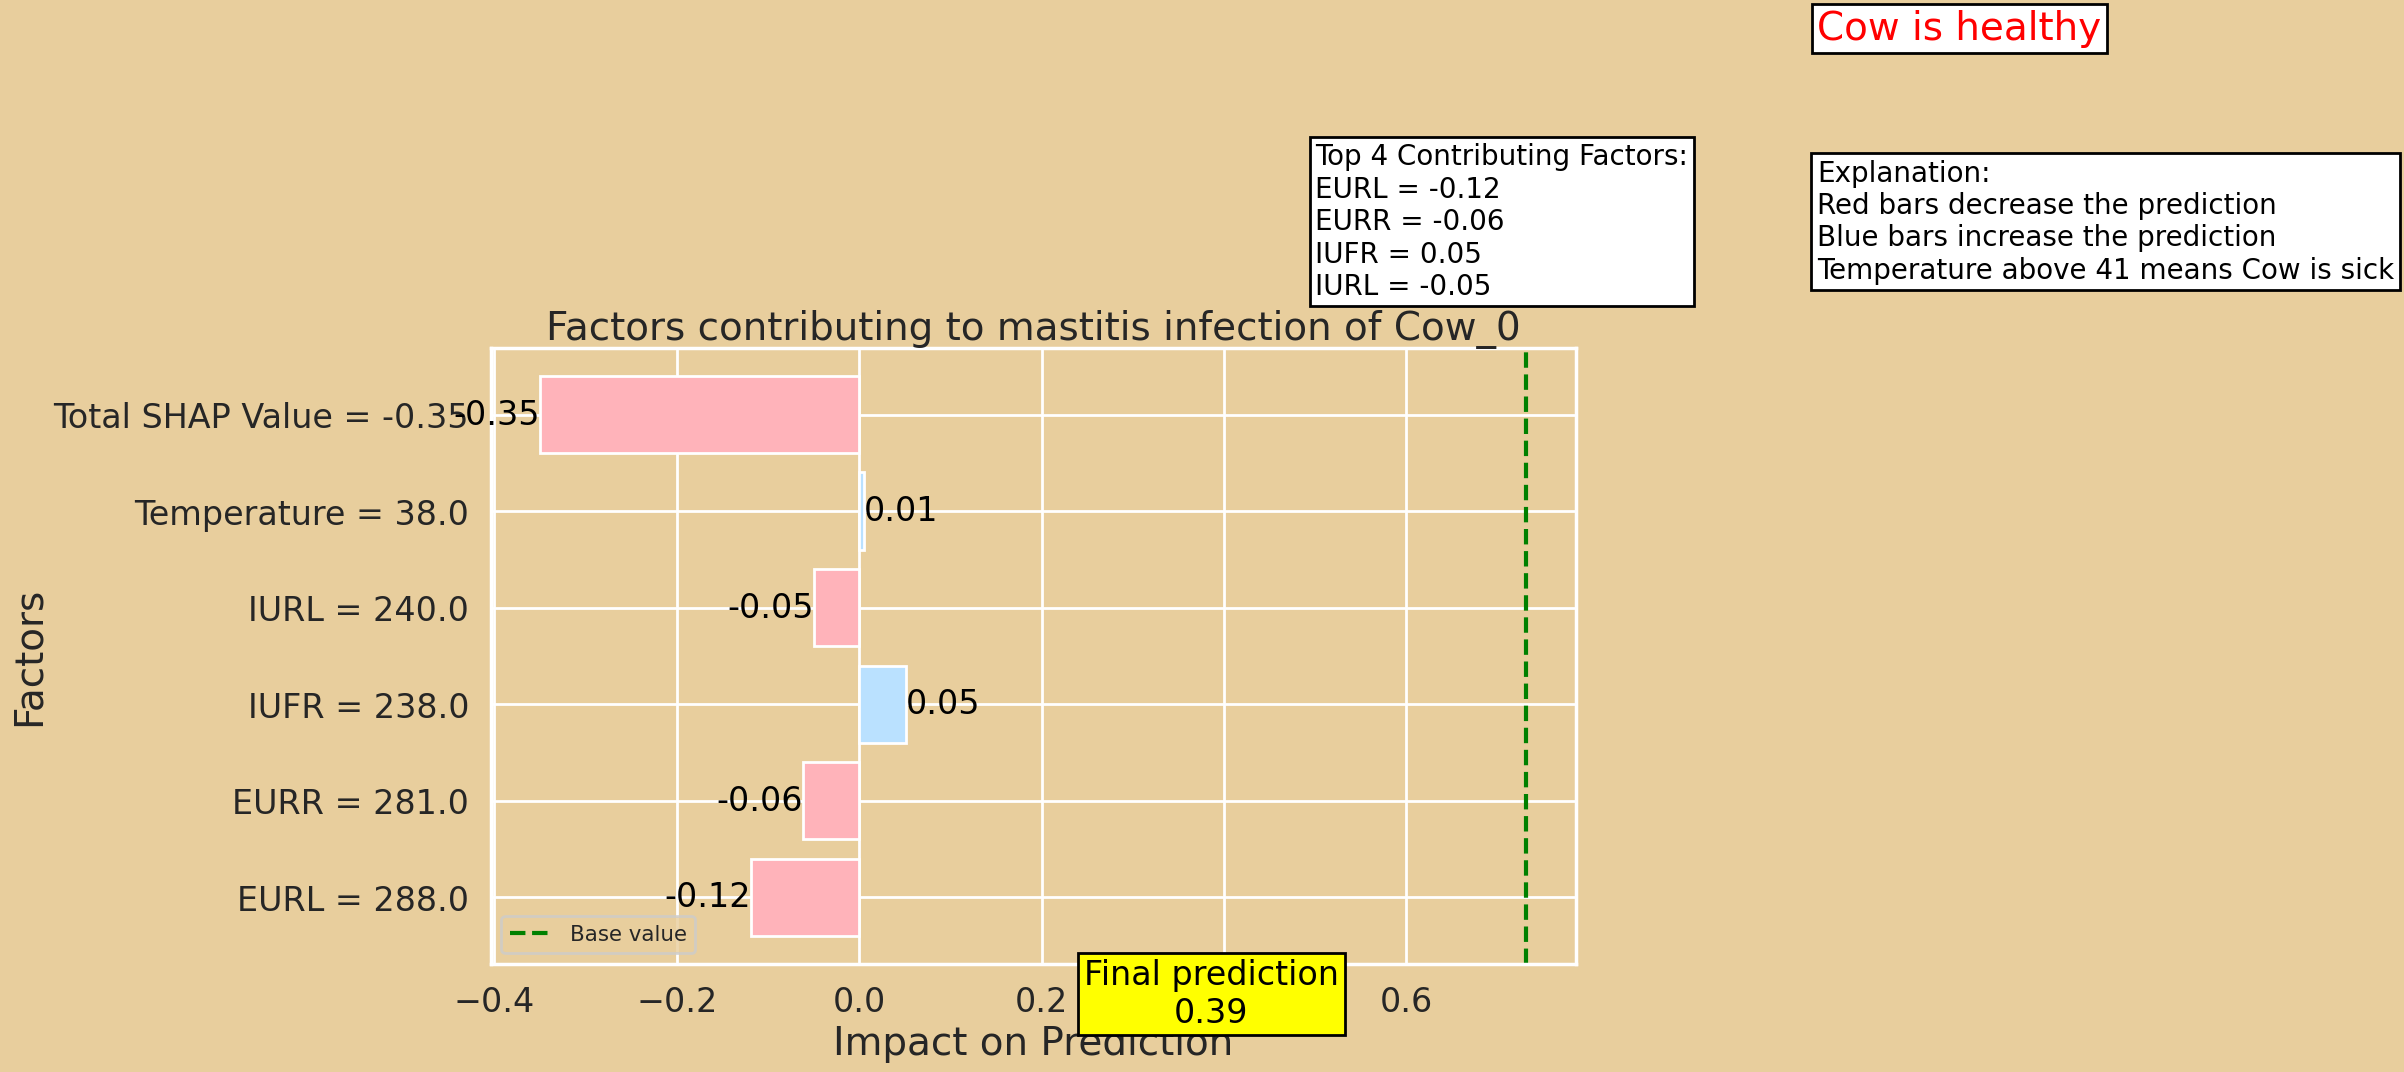

<Figure size 640x480 with 0 Axes>

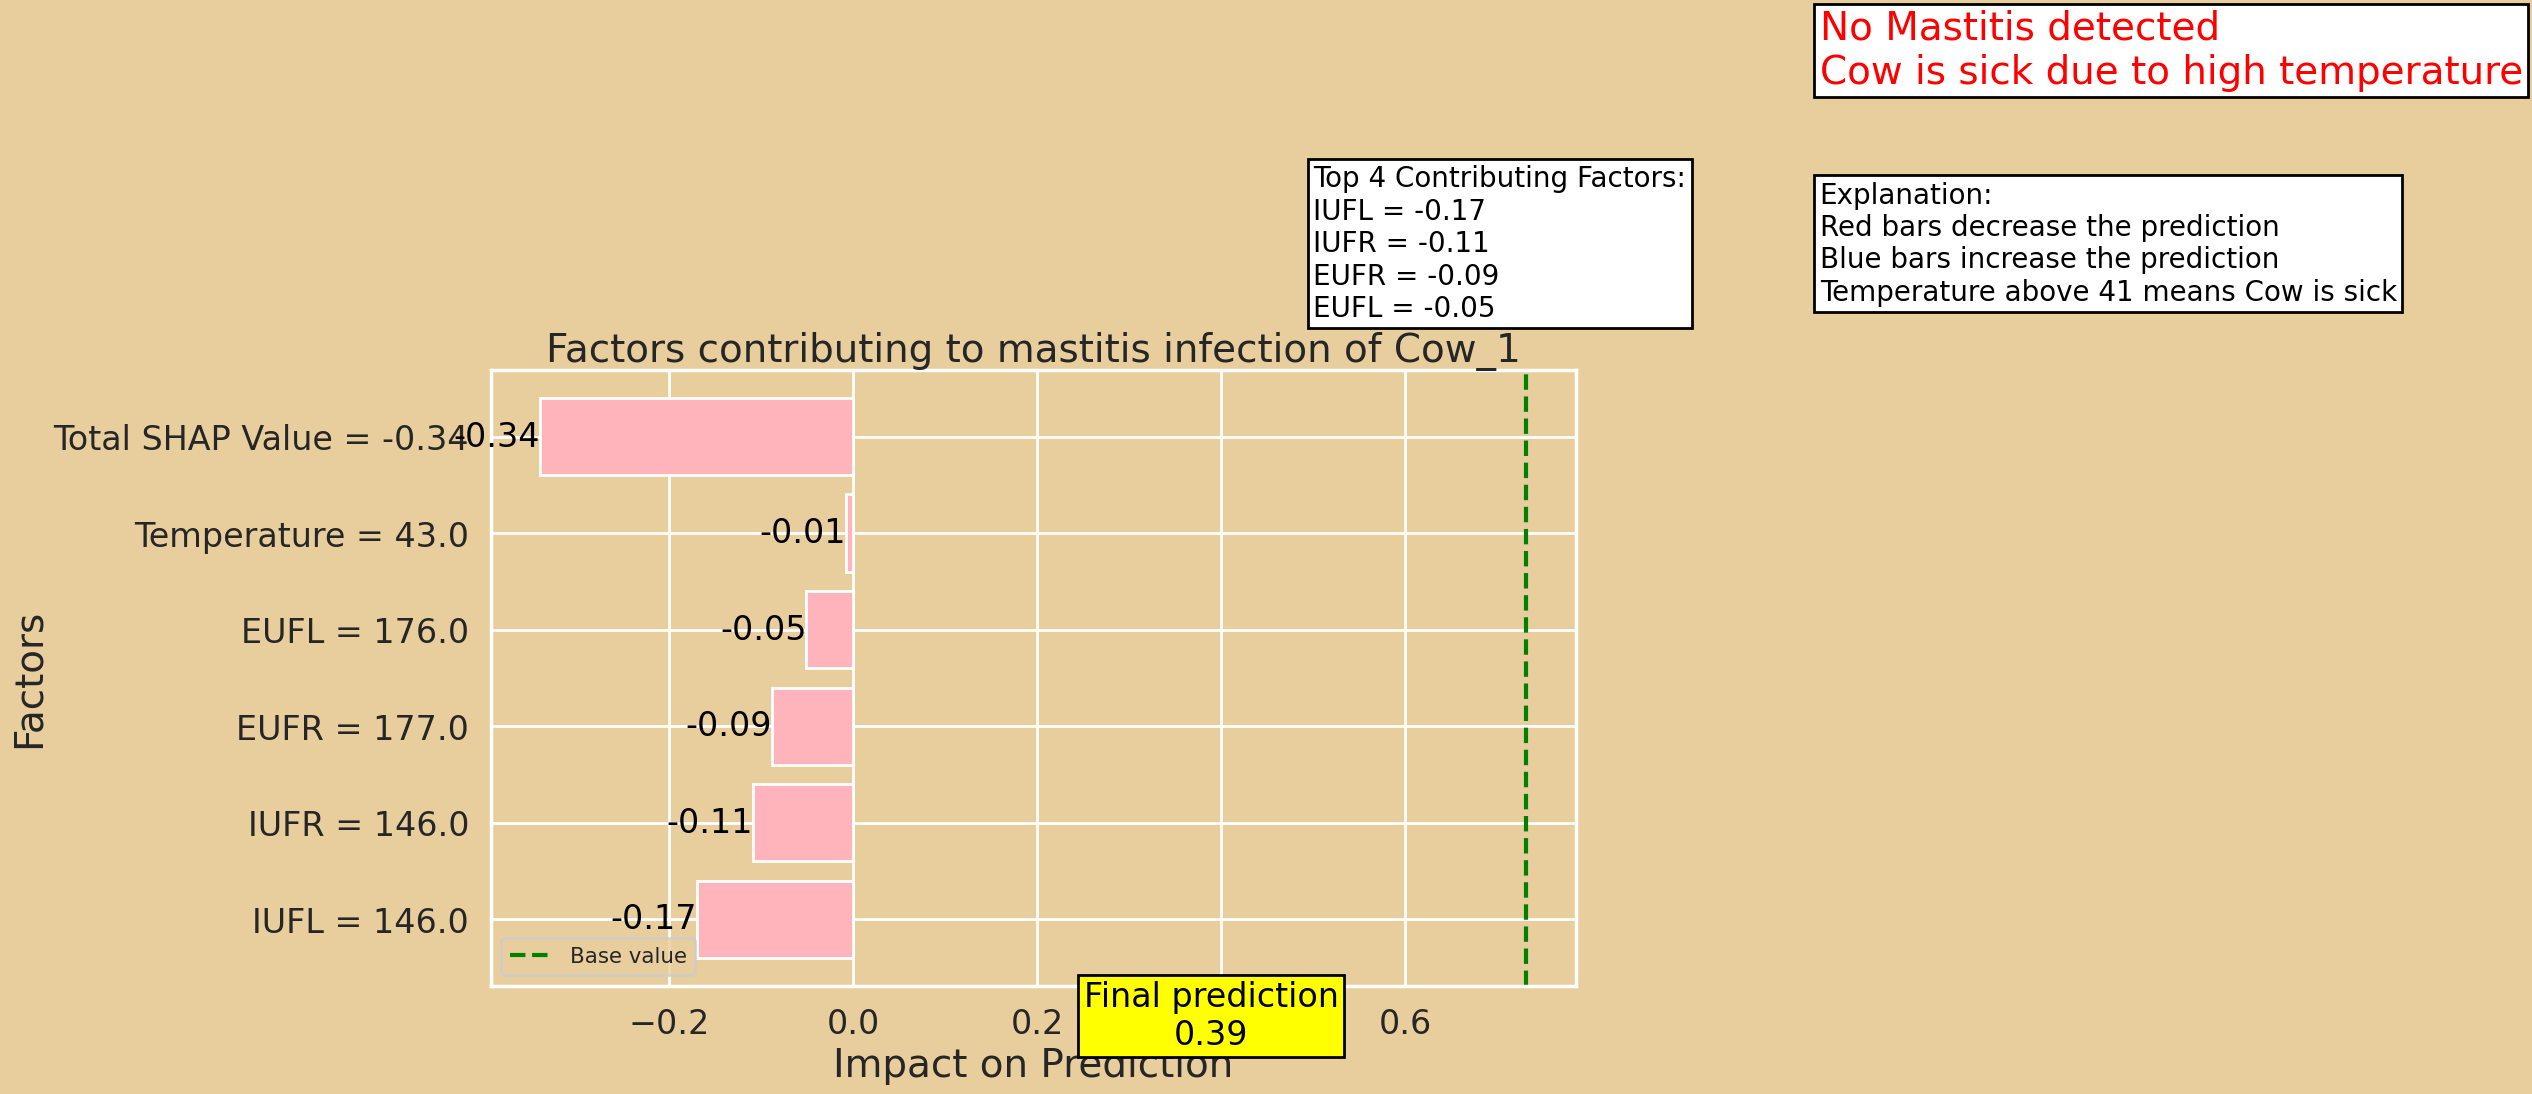

<Figure size 640x480 with 0 Axes>

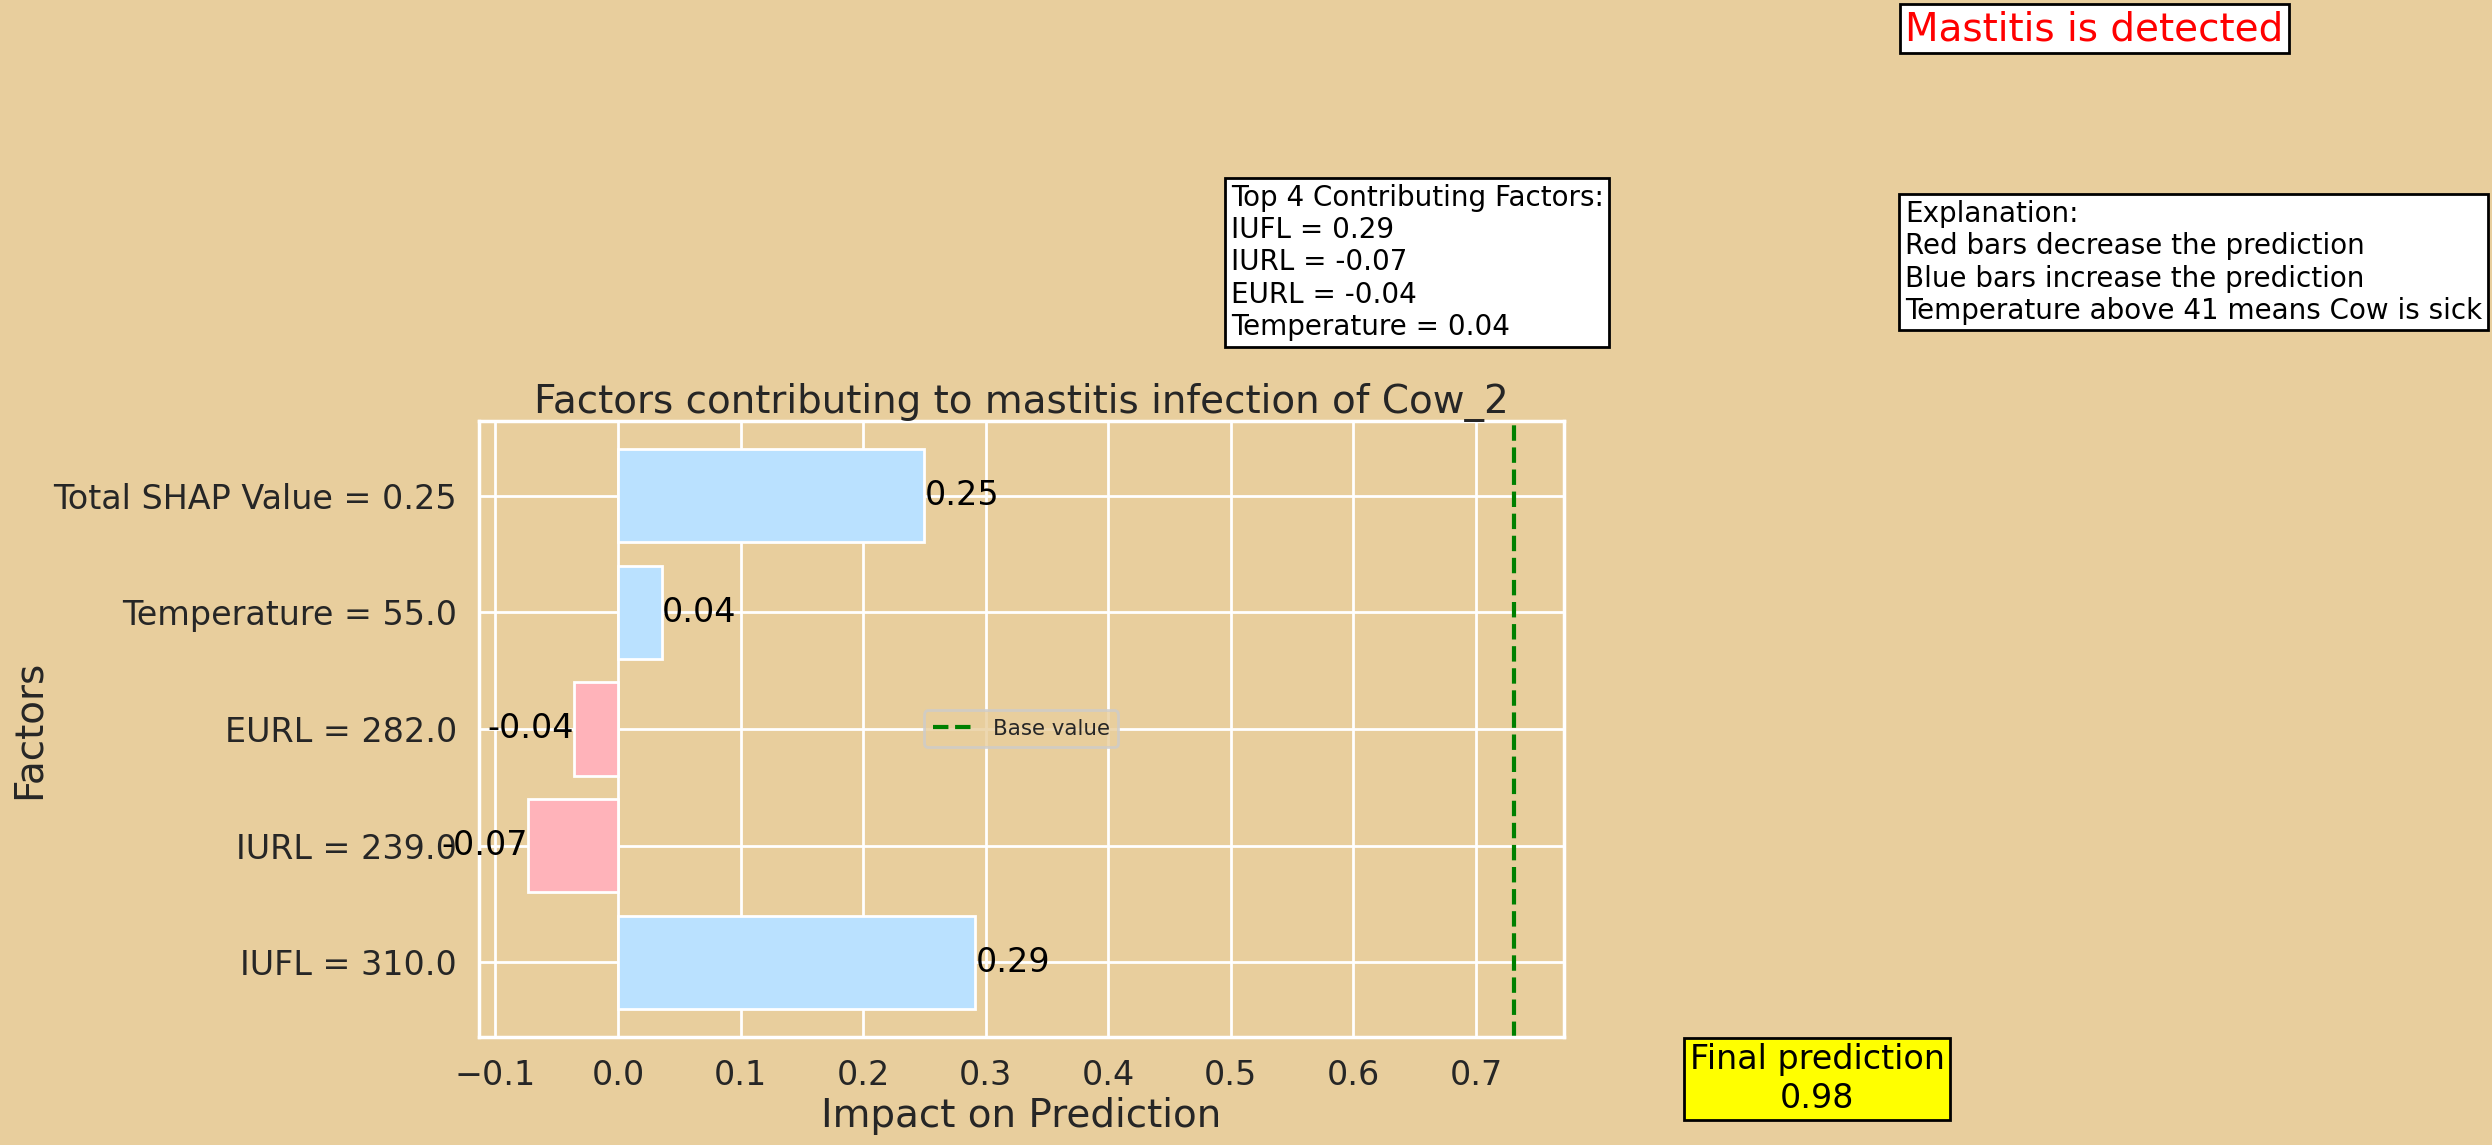

<Figure size 640x480 with 0 Axes>

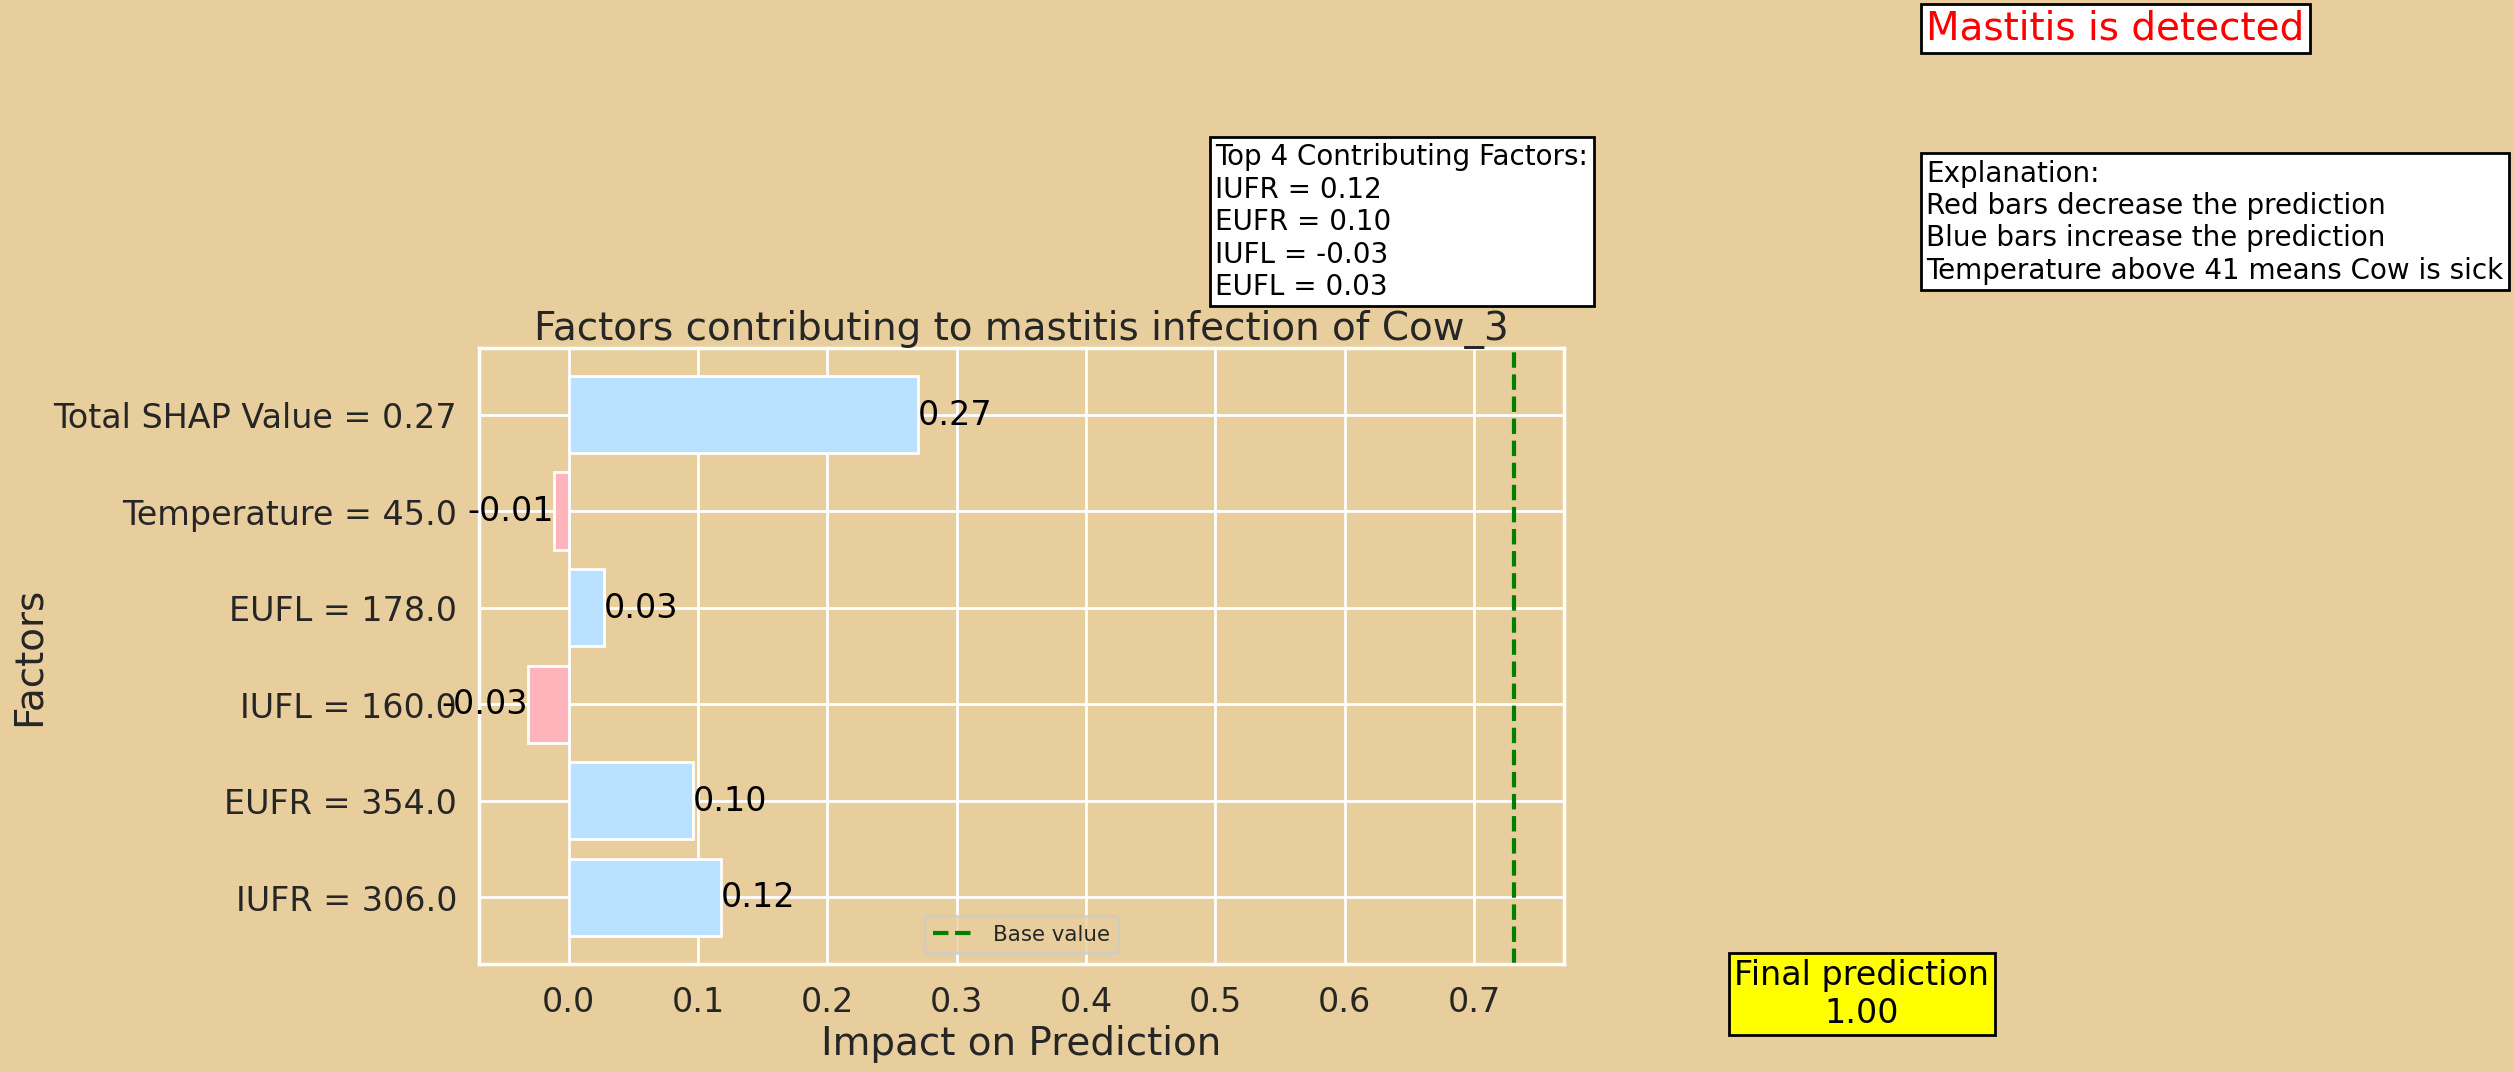

<Figure size 640x480 with 0 Axes>

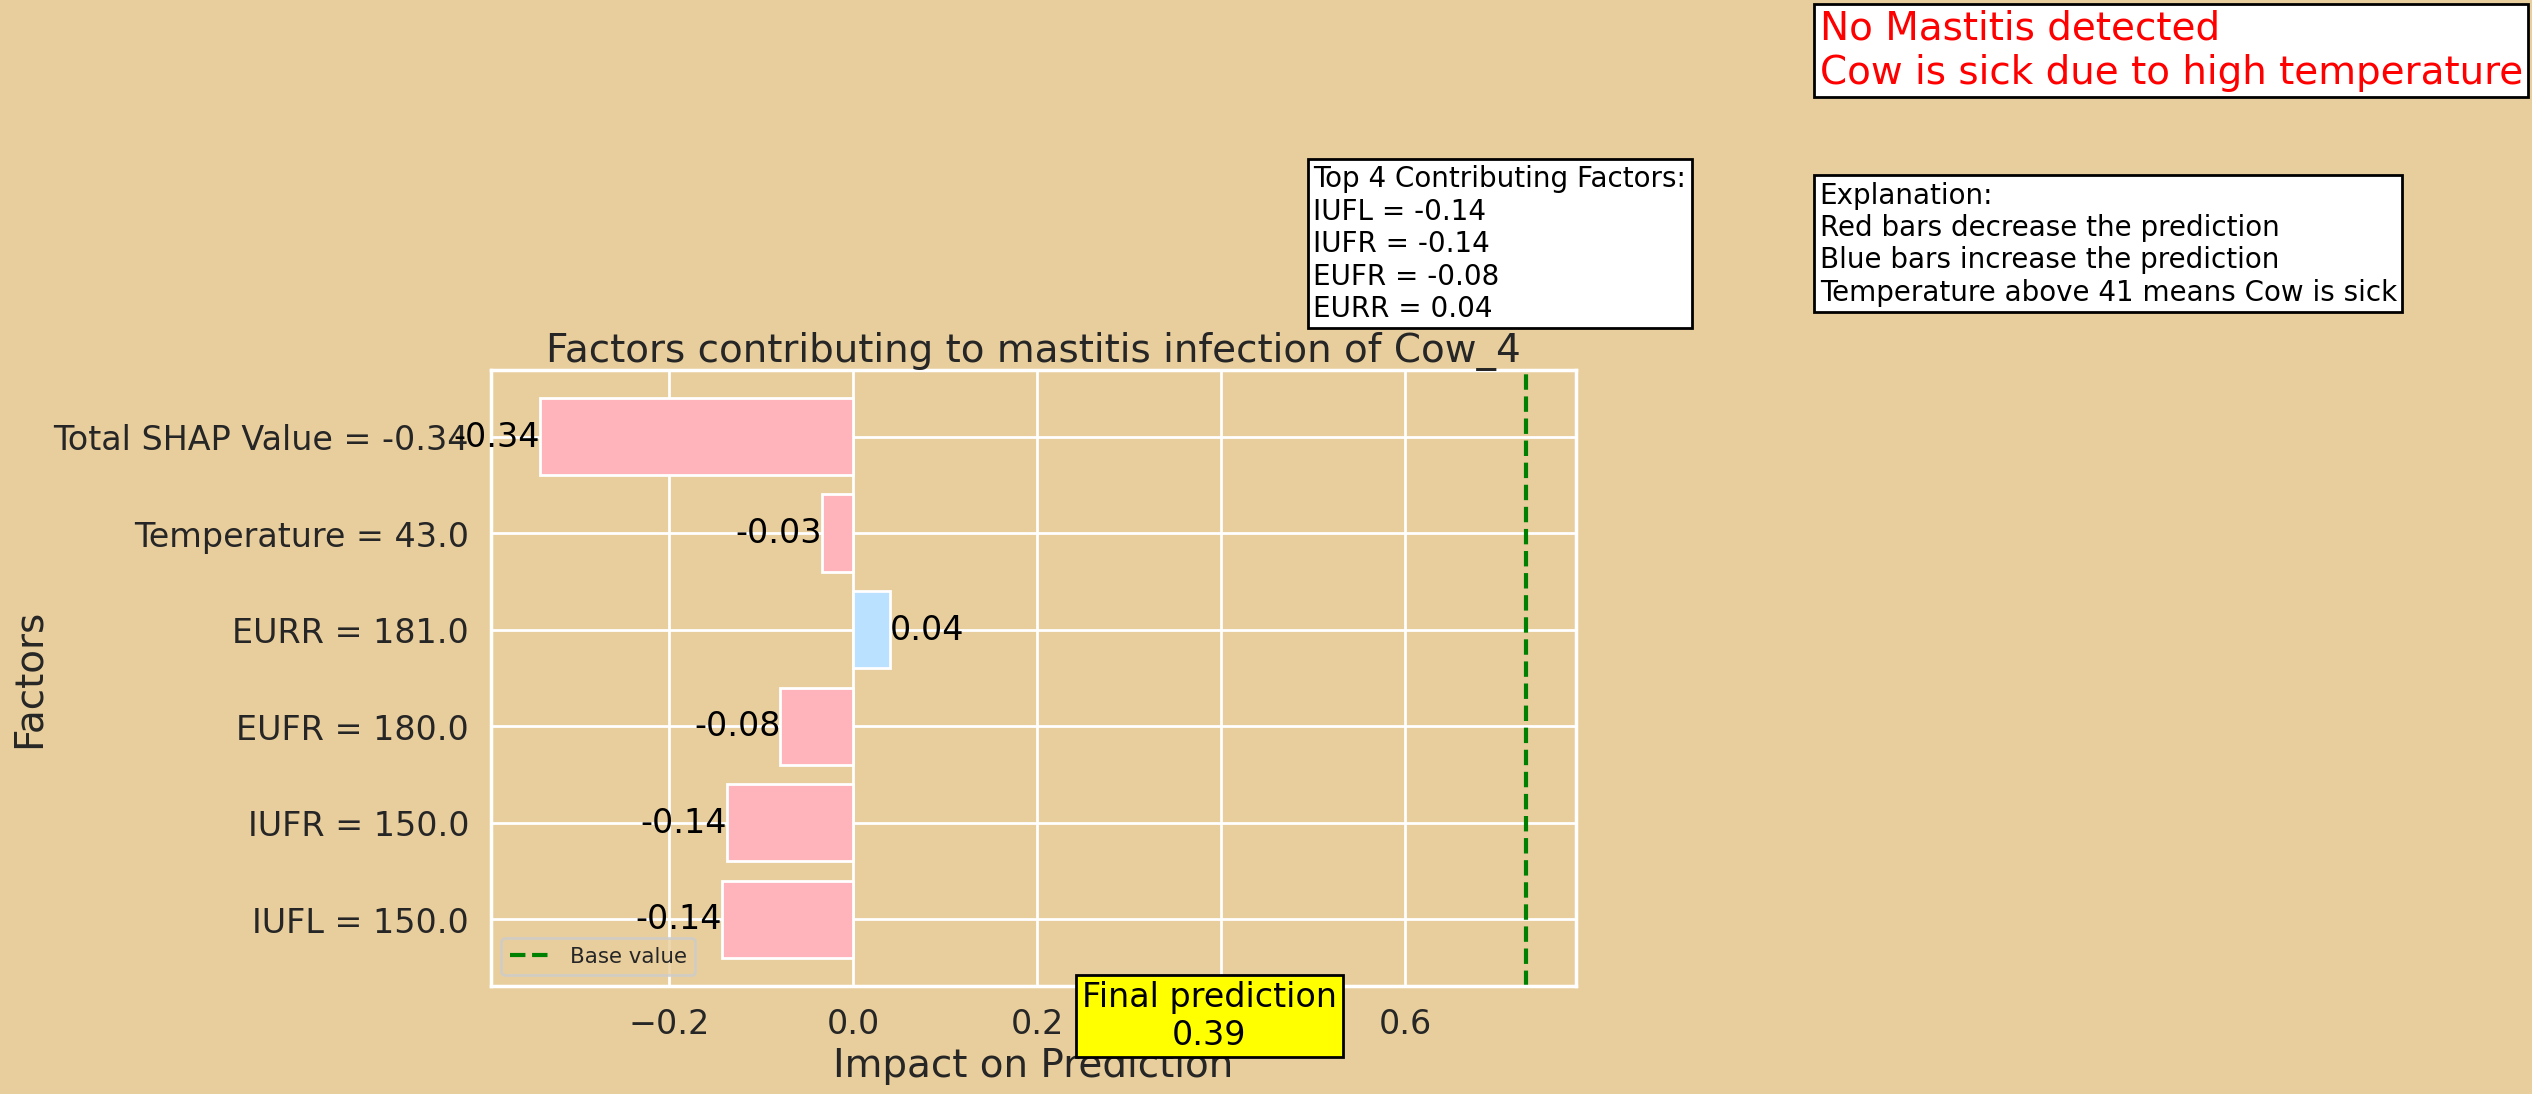

<Figure size 640x480 with 0 Axes>

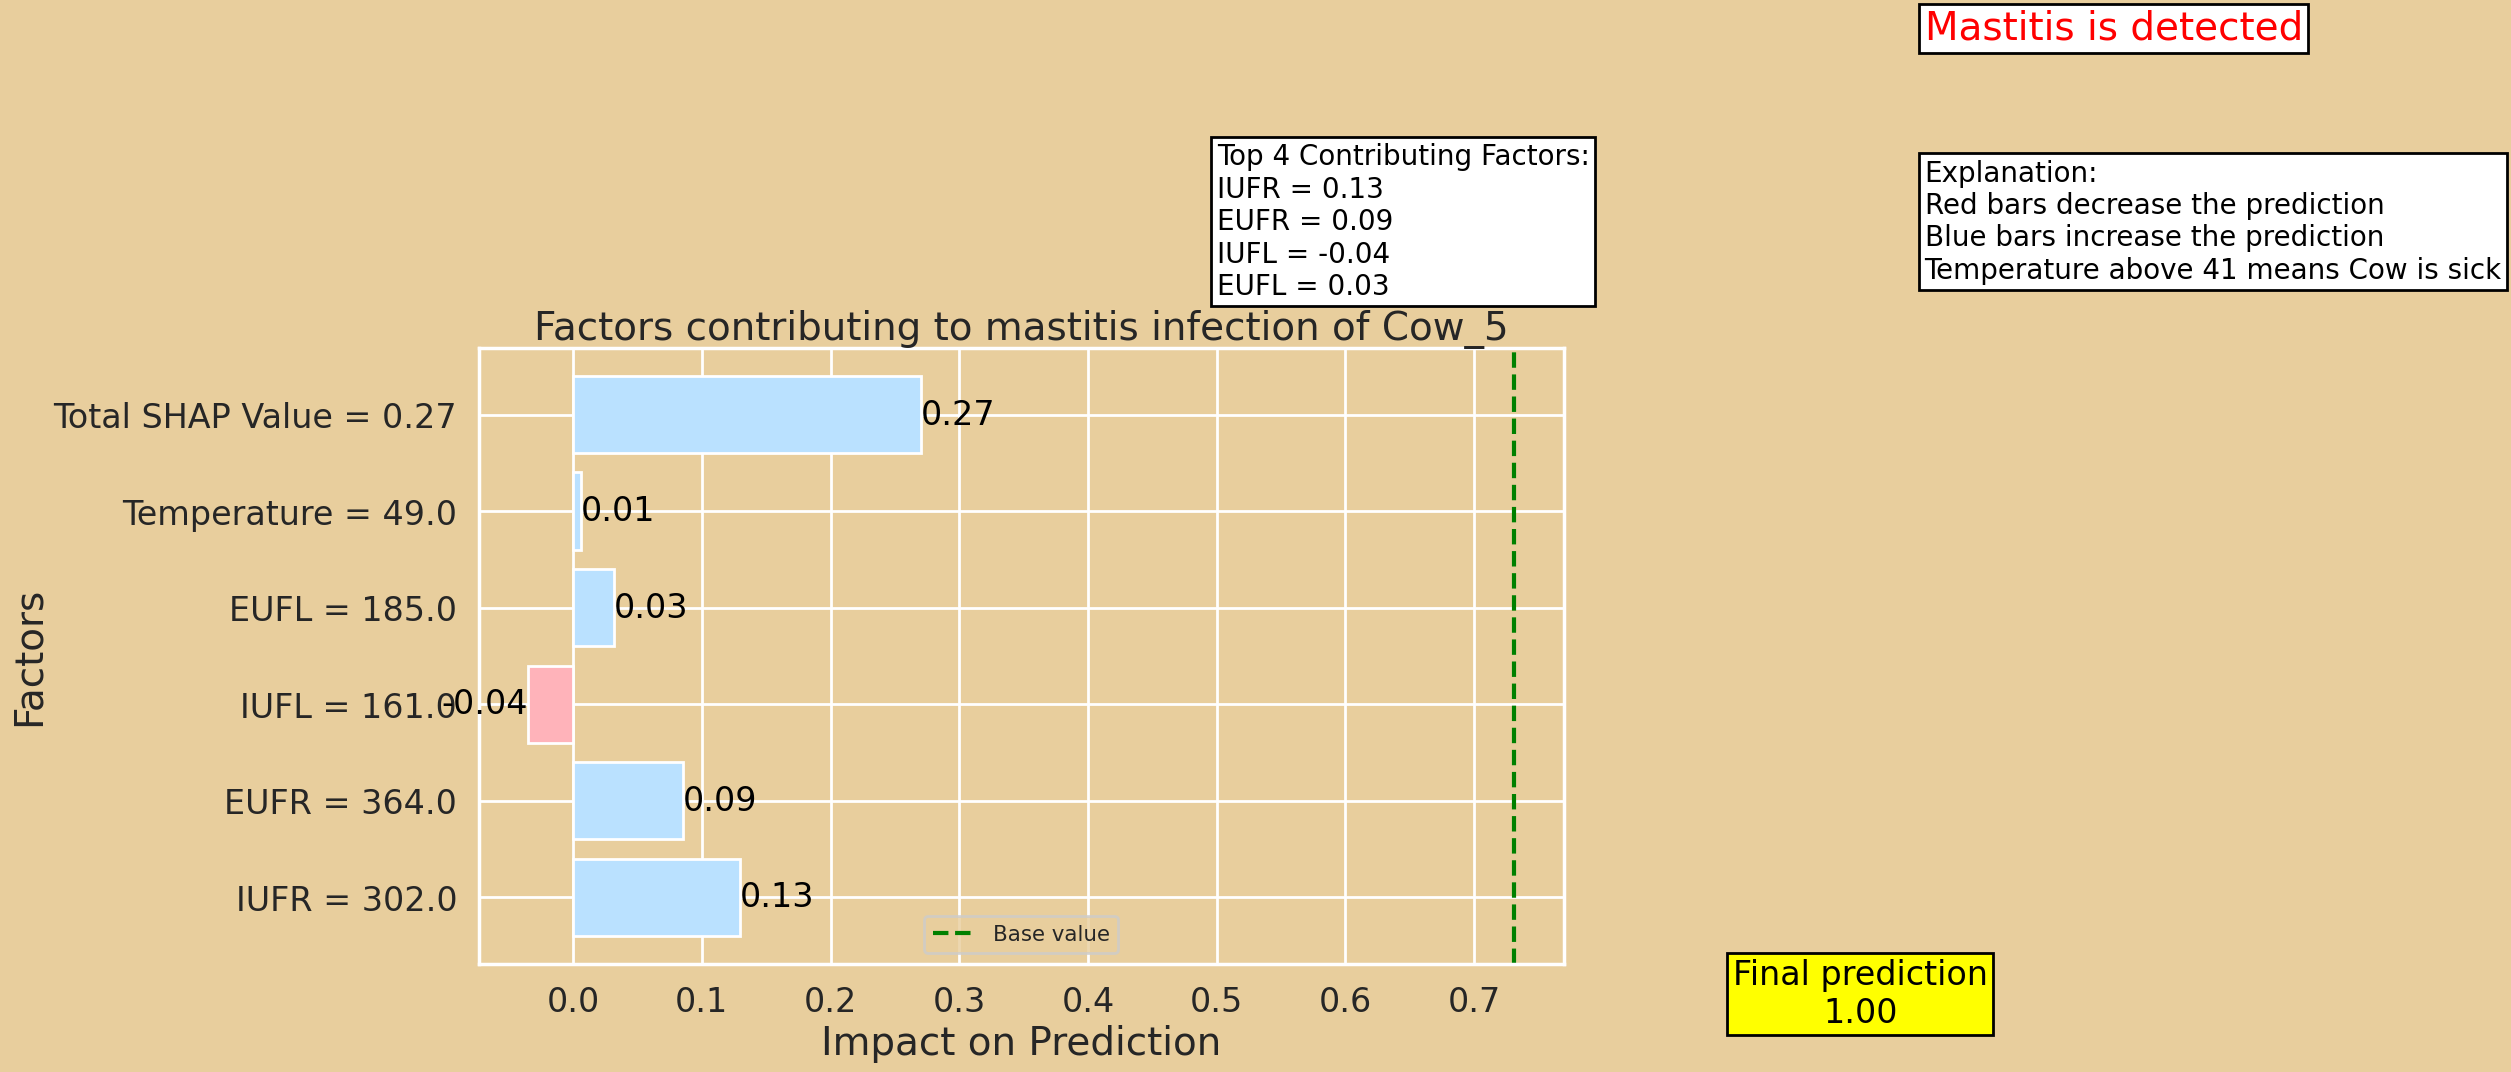

<Figure size 640x480 with 0 Axes>

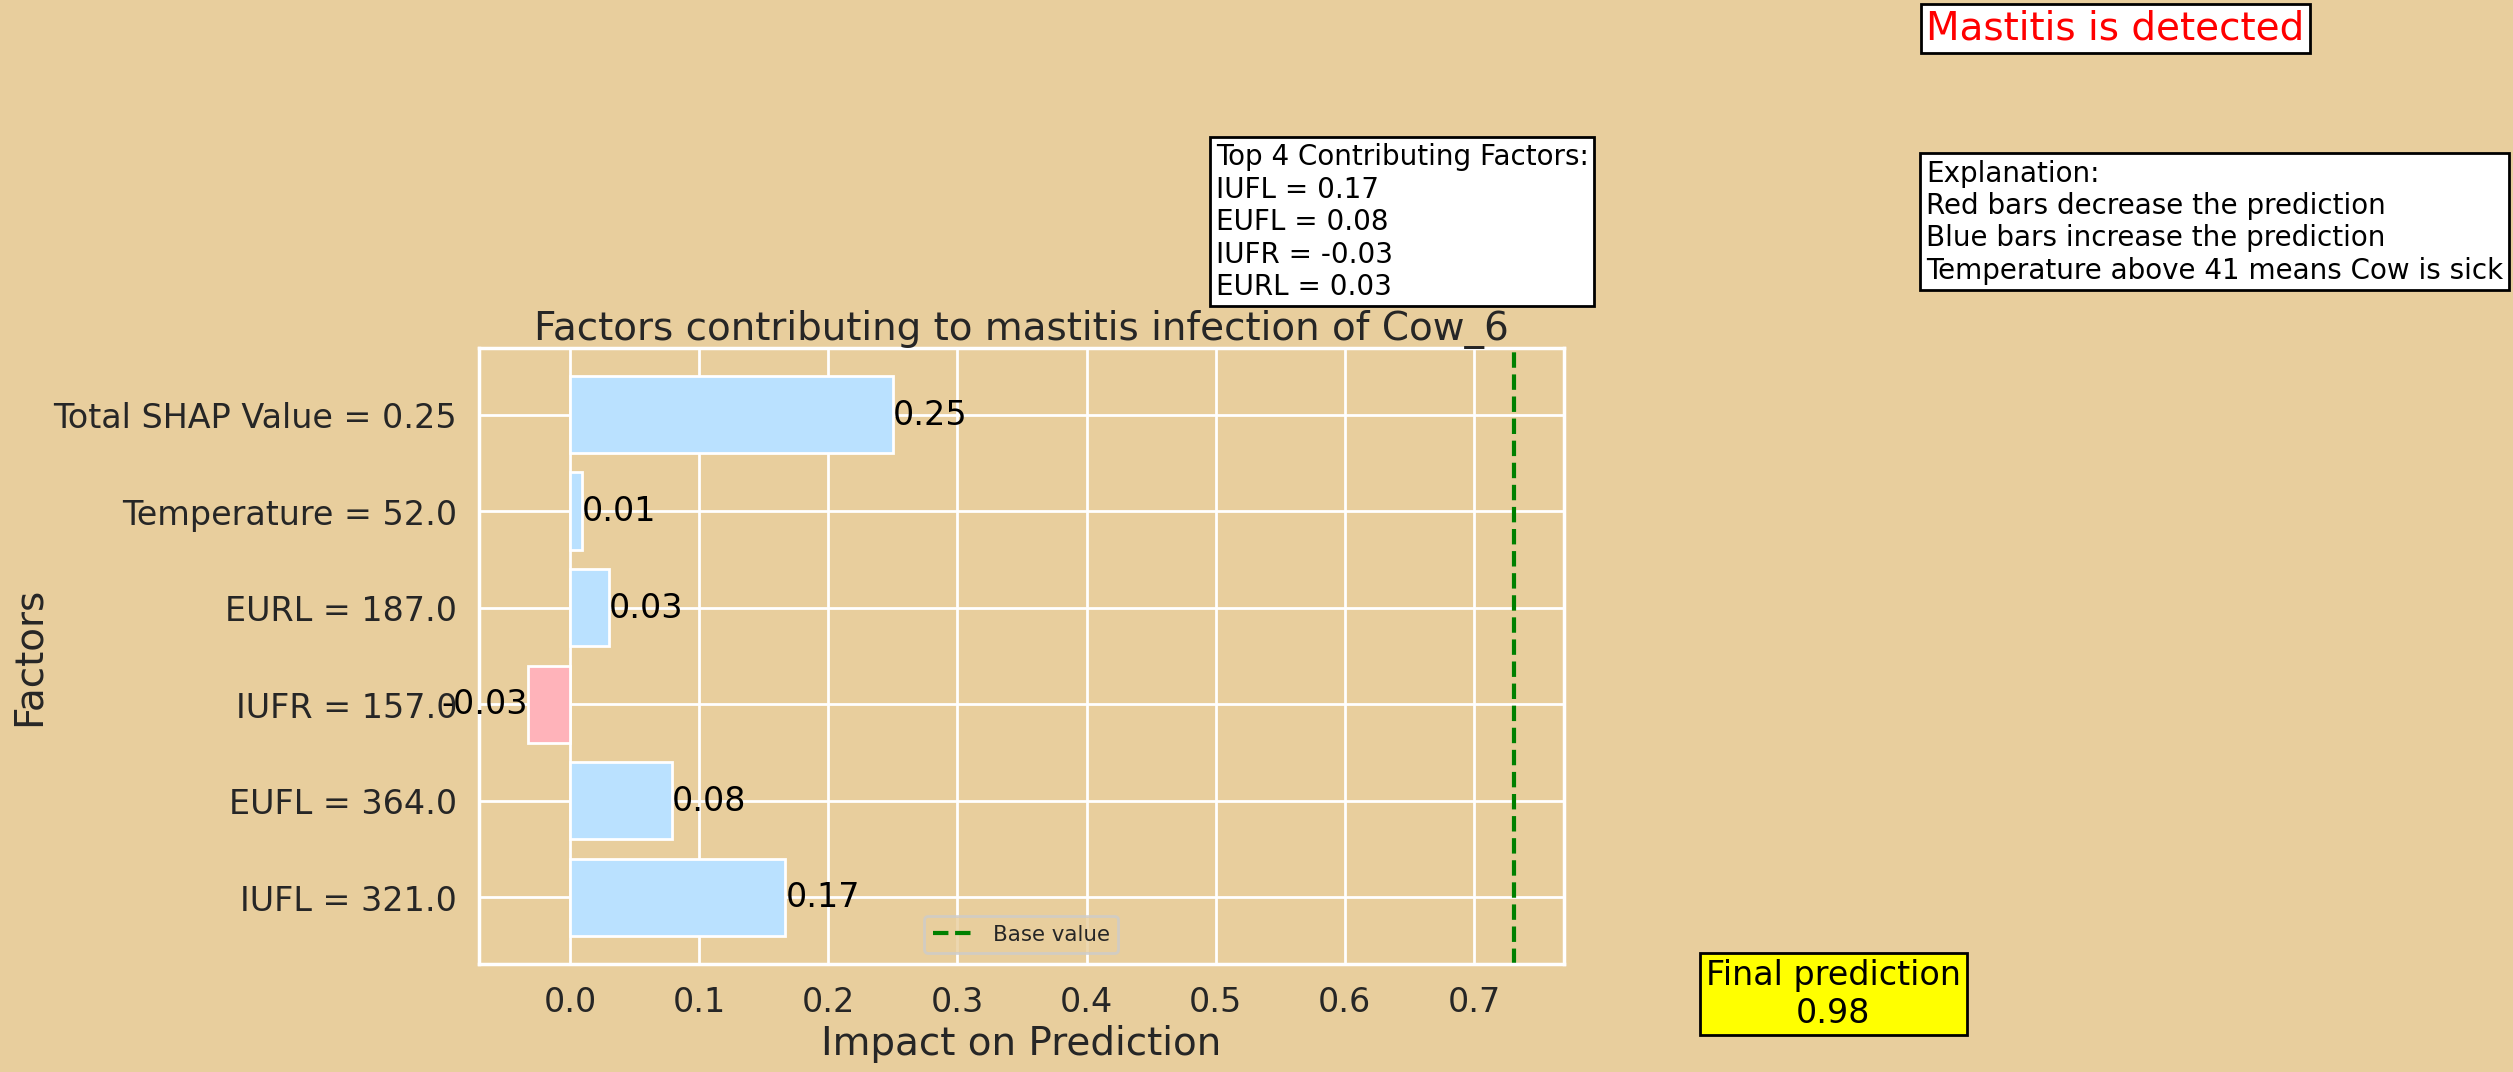

<Figure size 640x480 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt
import numpy as np

def determine_sickness(temperature, udder_values, prediction,threshold_temp=41, threshold_udder=180):
    if temperature > threshold_temp:
        #if any(val > threshold_udder for val in udder_values):
        if prediction == 1:
            return "Mastitis is detected"
        else:
            return "No Mastitis detected\nCow is sick due to high temperature"
    return "Cow is healthy"

def plot_shap_values(shap_values, feature_names, data, base_value, predictions, constant_features=['Temperature', 'Total SHAP Value']):
    for i in range(shap_values.shape[0]):
        shap_val = shap_values[i]
        feature_vals = data[i]
        prediction = predictions[i]

        # Calculate the final prediction
        final_prediction = base_value + shap_val.sum()

        # Sort features by absolute SHAP value
        sorted_indices = np.argsort(np.abs(shap_val))[::-1]
        sorted_shap_val = shap_val[sorted_indices]
        sorted_feature_vals = feature_vals[sorted_indices]
        sorted_feature_names = np.array(feature_names)[sorted_indices]

        # Select top 4 features by SHAP value
        top_indices = sorted_indices[:4]
        top_shap_val = shap_val[top_indices]
        top_feature_vals = feature_vals[top_indices]
        top_feature_names = np.array(feature_names)[top_indices]

        # Ensure the constant features are included
        for constant_feature in constant_features:
            if constant_feature == 'Total SHAP Value':
                total_shap_val = round(shap_val.sum(),2)
                if 'Total SHAP Value' not in top_feature_names:
                    top_shap_val = np.append(top_shap_val, total_shap_val)
                    
                    top_feature_vals = np.append(top_feature_vals, total_shap_val)
                    top_feature_names = np.append(top_feature_names, constant_feature)
            else:
                if constant_feature in feature_names:
                    constant_feature_index = feature_names.index(constant_feature)
                    if constant_feature not in top_feature_names:
                        top_shap_val = np.append(top_shap_val, shap_val[constant_feature_index])
                        
                        top_feature_vals = np.append(top_feature_vals, feature_vals[constant_feature_index])
                        top_feature_names = np.append(top_feature_names, constant_feature)

        # Ensure only 6 features are displayed
        if len(top_shap_val) > 6:
            top_shap_val = top_shap_val[:6]
            top_feature_vals = top_feature_vals[:6]
            top_feature_names = top_feature_names[:6]

        # Colors for the bars
        colors = ['#FFB3BA' if val < 0 else '#BAE1FF' for val in top_shap_val]
        highlight_colors = ['#FF6666' if val < 0 else '#6699FF' for val in top_shap_val]

        # Create the plot
        plt.figure(figsize=(14, 8))
        bars = plt.barh(np.arange(len(top_shap_val)), top_shap_val, color=colors)

        # Add base value line
        plt.axvline(base_value, color='green', linestyle='--', label='Base value')

        # Add SHAP value annotations
        for bar, val in zip(bars, top_shap_val):
            plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{val:.2f}', 
                     va='center', ha='left' if val > 0 else 'right', color='black',fontsize=24)
        plt.xticks(fontsize=24)
        # Add feature value annotations on y-axis
        plt.yticks(np.arange(len(top_shap_val)), 
                   [f"{name} = {value}" for name, value in zip(top_feature_names, top_feature_vals)],fontsize=24)

        # Explanation text
        plt.text(1.05, len(top_shap_val) + 1, 'Explanation:\nRed bars decrease the prediction\nBlue bars increase the prediction\nTemperature above 41 means Cow is sick',
                 va='center', ha='left', color='black', fontsize=20, bbox=dict(facecolor='white', edgecolor='black'))

        # Highlight the highest contributing factor excluding total shap value
        if len(top_shap_val) > 1:
            max_shap_value = max(top_shap_val[:-1], key=abs)
            max_feature_index = np.argmax(top_shap_val[:-1] == max_shap_value)
            #plt.annotate('Highest Contributing Factor',
                        # xy=(max_shap_value, max_feature_index),
                         #xytext=(max_shap_value + 0.1, max_feature_index),
                         #arrowprops=dict(facecolor='yellow', shrink=0.05),
                         #fontsize=12, color='blue', ha='left')

        # Add the final prediction as an annotation
        plt.text(final_prediction, -1, f'Final prediction\n{final_prediction:.2f}', 
                 va='center', ha='center',fontsize=24, color='black', bbox=dict(facecolor='yellow', edgecolor='black'))

        # Add top contributing factors
        top_contributors = "\n".join([f"{name} = {value:.2f}" for name, value in zip(top_feature_names[:4], top_shap_val[:4])])
        plt.text(0.5, len(top_shap_val) + 1, f'Top 4 Contributing Factors:\n{top_contributors}', 
                 va='center', ha='left', color='black', fontsize=20, bbox=dict(facecolor='white', edgecolor='black'))

        # Add sickness annotation
        temperature = feature_vals[feature_names.index('Temperature')]
        udder_values = [feature_vals[feature_names.index(f)] for f in feature_names if 'IUFL' in f or 'EUFL' in f]
        
        sickness_status = determine_sickness(temperature, udder_values,prediction)
        plt.text(1.05, len(top_shap_val) + 3, sickness_status, 
                 va='center', ha='left', color='red', fontsize=28, bbox=dict(facecolor='white', edgecolor='black'))

        # Set labels and title
        plt.xlabel('Impact on Prediction',fontsize=28)
        plt.ylabel('Factors',fontsize=28)
        plt.title(f'Factors contributing to mastitis infection of Cow_{i}',fontsize=28)
        plt.legend()
        plt.show()
        plt.savefig(f'cow_{i}_shap_plot.png', dpi=300, bbox_inches='tight', pad_inches=0.1)

# Example data from your SHAP values
shap_values = np.array([[-0.0249313 , -0.02220011, -0.04805024,  0.05117636, -0.03854101,
        -0.0499212 , -0.11806375, -0.03800474, -0.06164321,  0.00508279],
       [ 0.        , -0.16978972, -0.05044865, -0.10814502, -0.08780734,
         0.01647236,  0.0351134 ,  0.        ,  0.02974179, -0.00728942],
       [ 0.        ,  0.29160874,  0.        ,  0.01973205,  0.02528827,
        -0.07339267, -0.03626943, -0.01558695,  0.        ,  0.03561302],
       [ 0.00429352, -0.03156648,  0.0268775 ,  0.11733748,  0.09566912,
         0.01500875,  0.02662447,  0.0056644 ,  0.02024007, -0.01149809],
       [ 0.        , -0.14222494, -0.03710008, -0.13728571, -0.0789517 ,
        -0.00416108,  0.03199771,  0.0174903 ,  0.03976238, -0.03357058],
       [ 0.        , -0.03501506,  0.03168124,  0.12983159,  0.08551685,
         0.01555764,  0.01614246,  0.        ,  0.01866348,  0.00627204],
       [ 0.        ,  0.16671282,  0.07877897, -0.03249917,  0.0092327 ,
        -0.01321419,  0.02984047,  0.00667839, -0.00744425,  0.008913  ]])
# Feature names from your data
feature_names = ['Months_after_giving_birth', 'IUFL', 'EUFL', 'IUFR', 'EUFR', 'IURL', 'EURL', 'IURR', 'EURR', 'Temperature']


# Corresponding feature values for the examples
data = np.array([[  3, 242, 280, 238, 280, 240, 288, 242, 281,  38],
       [  4, 146, 176, 146, 177, 146, 175, 145, 176,  43],
       [  1, 310, 354, 239, 283, 239, 282, 235, 278,  55],
       [  6, 160, 178, 306, 354, 152, 180, 156, 177,  45],
       [  1, 150, 180, 150, 180, 150, 181, 150, 181,  43],
       [  3, 161, 185, 302, 364, 157, 190, 157, 189,  49],
       [  4, 321, 364, 157, 189, 156, 187, 154, 183,  52]])

# Base value for SHAP calculations (example)
base_value = 0.73129819
predictions = np.array([[0],[0],[1],[1],[0],[1],[1]])

plot_shap_values(shap_values, feature_names, data, base_value,predictions, constant_features=['Temperature', 'Total SHAP Value'])
